In [1]:
# import pandas_ta as ta
import ta
import pandas as pd
import numpy as np
from datetime import datetime
import main_functions
import plotly.graph_objects as go
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import importlib
# If you want to update the module:
importlib.reload(main_functions)
from main_functions import *

In [3]:
pd.set_option('display.max_rows', 400)  # Set the maximum number of rows to display

# Defining the variables

In [101]:
ticker = "BTCUSDT"
# timeframe = "1h"
# start = "2023-01-01"
timeframe = "1d"
start = "2019-09-08"
start_date = datetime.strptime(start, "%Y-%m-%d")
end = str(datetime.now())
# Calculate the difference in days
day = (datetime.now() - start_date).days

# OTHER PARAMETERS
fast_ma_period=18
slow_ma_period=75
rsi_period=14

sl_perc= 5 * 0.01
tp_perc= 8 * 0.01

In [102]:
df = getdata(ticker, timeframe, day)
df

,Open,High,Low,Close,Volume
timestamp,,,,,
2019-09-08,10000.00,10412.65,10000.00,10391.63,3096.291
2019-09-09,10316.62,10475.54,10077.22,10307.00,14824.373
2019-09-10,10307.00,10382.97,9940.87,10102.02,9068.955
2019-09-11,10094.27,10293.11,9884.31,10159.55,10897.922
2019-09-12,10163.06,10450.13,10042.12,10415.13,15609.634
...,...,...,...,...,...
2023-10-22,29895.40,30229.70,29606.60,29981.50,198602.758
2023-10-23,29981.40,35981.90,29869.40,33074.00,987741.536
2023-10-24,33074.00,35300.00,32833.50,33917.00,921993.063


In [95]:
# Define the function for the trading strategy
def getSignals(df, fast_ma_period=20, slow_ma_period=50, rsi_period=14):
    # df = getdata(ticker, timeframe)  # Assuming you have a getdata function that fetches the data

    # Calculate the moving averages
    df['shifted_open'] = df.Open.shift(-1)
    df['Fast_MA'] = ta.trend.sma_indicator(df['Close'], window=fast_ma_period)
    df['Slow_MA'] = ta.trend.sma_indicator(df['Close'], window=slow_ma_period)
    # Calculate the RSI
    rsi = ta.momentum.RSIIndicator(df['Close'], window=rsi_period)
    df['RSI'] = rsi.rsi()

    df['buySignal'] = np.where(
        (df['Fast_MA'] > df['Slow_MA']) &
        (df['Fast_MA'].shift(1) <= df['Slow_MA'].shift(1)) &
        (df['RSI'] > 50),
        1,
        0
    )
    
    return df

In [103]:
df = getSignals(df, fast_ma_period=fast_ma_period, slow_ma_period=slow_ma_period, rsi_period=rsi_period)
df

,Open,High,Low,Close,Volume,shifted_open,Fast_MA,Slow_MA,RSI,buySignal
timestamp,,,,,,,,,,
2019-09-08,10000.00,10412.65,10000.00,10391.63,3096.291,10316.62,NaN,NaN,NaN,0
2019-09-09,10316.62,10475.54,10077.22,10307.00,14824.373,10307.00,NaN,NaN,NaN,0
2019-09-10,10307.00,10382.97,9940.87,10102.02,9068.955,10094.27,NaN,NaN,NaN,0
2019-09-11,10094.27,10293.11,9884.31,10159.55,10897.922,10163.06,NaN,NaN,NaN,0
2019-09-12,10163.06,10450.13,10042.12,10415.13,15609.634,10414.96,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...
2023-10-22,29895.40,30229.70,29606.60,29981.50,198602.758,29981.40,27997.494444,27103.044000,74.553491,0
2023-10-23,29981.40,35981.90,29869.40,33074.00,987741.536,33074.00,28312.805556,27149.726667,85.330772,0
2023-10-24,33074.00,35300.00,32833.50,33917.00,921993.063,33917.00,28646.177778,27209.370667,86.952942,0


In [104]:
# Assuming you have a DataFrame 'df' and want to find rows where 'buySignal' is equal to 1
buy_signal_rows = df[df['buySignal'] == 1]
buy_signal_rows

,Open,High,Low,Close,Volume,shifted_open,Fast_MA,Slow_MA,RSI,buySignal
timestamp,,,,,,,,,,
2020-01-16,8825.35,8868.21,8596.25,8725.08,167958.963,8724.99,7851.492778,7772.243067,67.624017,1
2020-05-01,8623.61,9065.00,8619.84,8830.52,417820.386,8830.52,7483.903333,7466.957067,72.718856,1
2020-07-27,9939.68,11488.00,9928.61,11047.58,744752.400,11047.58,9448.972778,9409.279333,82.893621,1
2020-10-19,11501.50,11830.00,11404.01,11745.00,230161.648,11744.99,11123.616111,11120.301067,67.246454,1
2021-08-02,39846.78,40450.00,38658.00,39147.48,451872.128,39147.47,35677.298333,35579.588667,60.327125,1
2021-10-07,55327.45,55337.80,53374.34,53814.99,262974.545,53814.99,45714.118333,45648.791733,65.912212,1
2022-03-24,42867.80,44200.00,42525.00,43973.40,331440.057,43973.20,40531.677778,40445.852800,61.206800,1
2022-08-12,23917.30,24438.80,23560.00,24387.50,477734.045,24387.50,23275.105556,23227.738667,61.628800,1
2022-11-03,20140.20,20400.00,20026.00,20199.70,372121.061,20199.80,19924.377778,19871.110667,53.969863,1


# Backtest

In [112]:
def backtest(df,fast_ma_period=20, slow_ma_period=50, rsi_period=14, sl_perc=(5*0.01), tp_perc=(10*0.01)):
    df = getSignals(df, fast_ma_period, slow_ma_period, rsi_period)  # Use the trading_strategy function to get signals

    in_position = False
    buy_pos = False
    sell_pos = False

    results_df = pd.DataFrame(columns=['ticker', 'returns', 'winrate', 'trades', 'buy&hold_ret%'])
    buydates, buyprices = [], []
    selldates, sellprices = [], []
    profits = []

    for index, row in df.iterrows():
        # long position block
        if not in_position and row['buySignal'] == 1:
            buyprice = row['Close']
            buydates.append(index)
            buyprices.append(buyprice)
            in_position = True
            buy_pos = True
            stop_loss = buyprice * (1 - sl_perc)
            target_price = buyprice * (1 + tp_perc)

        elif in_position and buy_pos:
            if row['Low'] <= stop_loss:
                selldates.append(index)
                sellprice = stop_loss
                sellprices.append(sellprice)
                in_position = False
                buy_pos = False
                profits.append((sellprice - buyprice) / buyprice - 0.001)  # Account for a small commission fee (0.1%)

            elif row['High'] >= target_price:
                selldates.append(index)
                sellprice = target_price
                sellprices.append(sellprice)
                in_position = False
                buy_pos = False
                profits.append((sellprice - buyprice) / buyprice - 0.001)  # Account for a small commission fee (0.1%)

    try:
        if len(buydates) == 0:
            print("No trades were made.")
        else:
            returns = (pd.Series(profits, dtype=float) + 1).prod() - 1
            returns = round(returns * 100, 2)

            wins = sum(1 for i in profits if i > 0)
            winrate = round((wins / len(buydates)) * 100, 2)
            ct = min(len(buydates), len(selldates))
            buy_hold_ret = (df['Close'][-1] - df['Open'][0]) / df['Open'][0] * 100
            
            results_df.loc[len(results_df)] = [ticker, returns, winrate, ct, buy_hold_ret]
            print(f'{ticker}, winrate={winrate}%, returns={returns}%, no. of trades = {ct}, buy&hold_ret = {buy_hold_ret}%')
    except:
        print('Invalid input')

    return {
        'buydates': buydates,
        'buyprices': buyprices,
        'selldates': selldates,
        'sellprices': sellprices,
        'profits': profits,
        # Other results...
    }, results_df

def displayTrades(**kwargs):
    # Access the trade data and other results from kwargs
    buydates = kwargs['buydates']
    buyprices = kwargs['buyprices']
    selldates = kwargs['selldates']
    sellprices = kwargs['sellprices']
    profits = kwargs['profits']
    
    ct = min(len(buydates),len(selldates))
    dfr =pd.DataFrame()
    dfr['buydates']= buydates[:ct]
    dfr['buyprice']= buyprices[:ct]
    dfr['selldates'] = selldates[:ct]
    dfr['sellprice'] = sellprices[:ct]
    dfr['profits'] = (profits[:ct])
    dfr['commulative_returns'] = ((pd.Series(profits) + 1).cumprod())
    dfr['tradeSide'] = np.where(dfr['buydates'] < dfr['selldates'], 'Long', 'Short')
    return dfr

In [106]:
results_data, results_df = backtest(df, fast_ma_period, slow_ma_period, rsi_period, sl_perc, tp_perc)

BTCUSDT, winrate=54.55%, returns=21.47%, no. of trades = 11, buy&hold_ret = 240.89999999999998%


In [107]:
results_df

,ticker,returns,winrate,trades,buy&hold_ret%
0,BTCUSDT,21.47,54.55,11,240.9


In [108]:
dfr = displayTrades(**results_data)
dfr

,buydates,buyprice,selldates,sellprice,profits,commulative_returns,tradeSide
0,2020-01-16,8725.08,2020-01-24,8288.8260,-0.051,0.949000,Long
1,2020-05-01,8830.52,2020-05-07,9536.9616,0.079,1.023971,Long
2,2020-07-27,11047.58,2020-08-02,10495.2010,-0.051,0.971748,Long
3,2020-10-19,11745.00,2020-10-21,12684.6000,0.079,1.048517,Long
4,2021-08-02,39147.48,2021-08-06,42279.2784,0.079,1.131349,Long
5,2021-10-07,53814.99,2021-10-14,58120.1892,0.079,1.220726,Long
6,2022-03-24,43973.40,2022-03-28,47491.2720,0.079,1.317163,Long
7,2022-08-12,24387.50,2022-08-18,23168.1250,-0.051,1.249988,Long
8,2022-11-03,20199.70,2022-11-08,19189.7150,-0.051,1.186239,Long
9,2023-01-14,20962.80,2023-01-20,22639.8240,0.079,1.279952,Long


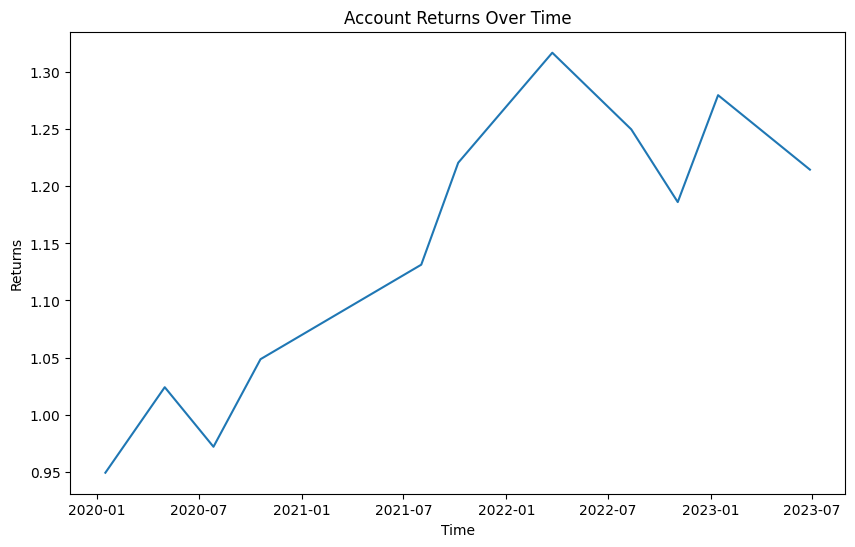

In [109]:
import matplotlib.pyplot as plt

# Set the plot size
plt.figure(figsize=(10,6))

# Plot the account balance column
plt.plot(dfr.buydates, dfr.commulative_returns)

# Add labels to the plot
plt.title('Account Returns Over Time')
plt.xlabel('Time')
plt.ylabel('Returns')

# Display the plot
plt.show()

# Set Final Bot Parameters

In [20]:
ticker = "BTCUSDT"
timeframe = "1d"
usdt_amount = 15


fast_ma_period=18          # ----> TO BE OPTIMIZED
slow_ma_period=75          # ----> TO BE OPTIMIZED
rsi_period=14              # ----> TO BE OPTIMIZED
sl_perc=5
tp_perc=10

# Optuna Hyperparameter Optimization

In [113]:
import optuna # !pip install optuna

# streamlit inputs should be mult,HL and risk upper and lower values also number of trials (default=100)

def objective(trial):
    fast_ma_period = trial.suggest_int("fast_ma_period", 10, 25)
    slow_ma_period = trial.suggest_int("slow_ma_period", 50, 75)
    rsi_period = trial.suggest_int("rsi_period", 11, 24)
    sl_perc = trial.suggest_float("sl_perc", 3, 8)
    tp_perc = trial.suggest_float("tp_perc", 5, 12)
    
    # Run your strategy with the trial parameters and calculate a score
    score = backtest(df, fast_ma_period, slow_ma_period, rsi_period, sl_perc=sl_perc*0.01, tp_perc=tp_perc*0.01)
    return score

# Create an Optuna study and run optimization
study = optuna.create_study(direction="maximize")  # You can also use "minimize" depending on your objective
study.optimize(objective, n_trials=100)

# Retrieve the best parameters and score
best_params = study.best_params
best_score = study.best_value

print("Best Parameters:", best_params)
print("Best Score:", best_score)


[I 2023-10-27 02:48:02,297] A new study created in memory with name: no-name-bad6e6ad-d6b7-482c-97a4-5848de1a69ec
[W 2023-10-27 02:48:02,532] Trial 0 failed with parameters: {'fast_ma_period': 21, 'slow_ma_period': 59, 'rsi_period': 20, 'sl_perc': 5.03194342899141, 'tp_perc': 6.769265514638461} because of the following error: The value {'buydates': [Timestamp('2020-01-11 00:00:00'), Timestamp('2020-04-24 00:00:00'), Timestamp('2020-07-28 00:00:00'), Timestamp('2020-10-16 00:00:00'), Timestamp('2021-08-02 00:00:00'), Timestamp('2021-10-11 00:00:00'), Timestamp('2022-03-01 00:00:00'), Timestamp('2022-03-16 00:00:00'), Timestamp('2022-03-25 00:00:00'), Timestamp('2022-08-03 00:00:00'), Timestamp('2022-11-01 00:00:00'), Timestamp('2023-01-09 00:00:00'), Timestamp('2023-03-18 00:00:00'), Timestamp('2023-06-27 00:00:00'), Timestamp('2023-10-06 00:00:00')], 'buyprices': [8020.56, 7504.11, 10919.94, 11318.92, 39147.48, 57500.01, 44394.1, 41105.8, 44290.6, 22801.5, 20472.1, 17169.7, 26907.0, 30

BTCUSDT, winrate=73.33%, returns=64.78%, no. of trades = 15, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:02,769] Trial 1 failed with parameters: {'fast_ma_period': 23, 'slow_ma_period': 60, 'rsi_period': 13, 'sl_perc': 5.113428658641226, 'tp_perc': 7.327519611642483} because of the following error: The value {'buydates': [Timestamp('2020-01-12 00:00:00'), Timestamp('2020-04-25 00:00:00'), Timestamp('2020-07-28 00:00:00'), Timestamp('2020-10-17 00:00:00'), Timestamp('2021-08-03 00:00:00'), Timestamp('2021-10-12 00:00:00'), Timestamp('2022-02-28 00:00:00'), Timestamp('2022-03-18 00:00:00'), Timestamp('2022-08-04 00:00:00'), Timestamp('2022-11-03 00:00:00'), Timestamp('2023-01-10 00:00:00'), Timestamp('2023-03-17 00:00:00'), Timestamp('2023-06-27 00:00:00'), Timestamp('2023-10-06 00:00:00')], 'buyprices': [8186.7, 7534.01, 10919.94, 11356.25, 38203.26, 56011.84, 43155.0, 41751.5, 22608.9, 20199.7, 17428.8, 27384.0, 30683.2, 27916.3], 'selldates': [Timestamp('2020-01-14 00:00:00'), Timestamp('2020-04-29 00:00:00'), Timestamp('2020-08-01 00:00:00'), Timestamp('2020-10-21 00

BTCUSDT, winrate=78.57%, returns=83.49%, no. of trades = 14, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:03,016] Trial 2 failed with parameters: {'fast_ma_period': 18, 'slow_ma_period': 59, 'rsi_period': 23, 'sl_perc': 4.316921634270111, 'tp_perc': 8.3146073001438} because of the following error: The value {'buydates': [Timestamp('2019-11-07 00:00:00'), Timestamp('2020-01-11 00:00:00'), Timestamp('2020-04-24 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-16 00:00:00'), Timestamp('2021-08-01 00:00:00'), Timestamp('2021-10-10 00:00:00'), Timestamp('2022-03-23 00:00:00'), Timestamp('2022-08-02 00:00:00'), Timestamp('2022-10-31 00:00:00'), Timestamp('2023-01-10 00:00:00'), Timestamp('2023-03-19 00:00:00'), Timestamp('2023-06-26 00:00:00'), Timestamp('2023-10-05 00:00:00')], 'buyprices': [9219.64, 8020.56, 7504.11, 11047.58, 11318.92, 39846.78, 54700.0, 42867.9, 22975.1, 20482.0, 17428.8, 27955.7, 30260.1, 27398.4], 'selldates': [Timestamp('2019-11-08 00:00:00'), Timestamp('2020-01-14 00:00:00'), Timestamp('2020-04-29 00:00:00'), Timestamp('2020-08-02 00:0

BTCUSDT, winrate=57.14%, returns=43.41%, no. of trades = 14, buy&hold_ret = 240.89999999999998%
BTCUSDT, winrate=57.14%, returns=57.26%, no. of trades = 14, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:03,221] Trial 3 failed with parameters: {'fast_ma_period': 17, 'slow_ma_period': 57, 'rsi_period': 18, 'sl_perc': 5.578431656047169, 'tp_perc': 10.665061071422397} because of the following error: The value {'buydates': [Timestamp('2019-11-06 00:00:00'), Timestamp('2020-01-10 00:00:00'), Timestamp('2020-04-23 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-15 00:00:00'), Timestamp('2021-07-31 00:00:00'), Timestamp('2021-10-10 00:00:00'), Timestamp('2022-03-24 00:00:00'), Timestamp('2022-07-31 00:00:00'), Timestamp('2022-10-30 00:00:00'), Timestamp('2023-01-10 00:00:00'), Timestamp('2023-03-19 00:00:00'), Timestamp('2023-06-25 00:00:00'), Timestamp('2023-10-04 00:00:00')], 'buyprices': [9343.6, 8207.09, 7483.35, 11047.58, 11502.0, 41448.11, 54700.0, 43973.4, 23290.1, 20615.6, 17428.8, 27955.7, 30458.0, 27759.8], 'selldates': [Timestamp('2019-11-08 00:00:00'), Timestamp('2020-01-19 00:00:00'), Timestamp('2020-04-29 00:00:00'), Timestamp('2020-08-17 00:

BTCUSDT, winrate=63.64%, returns=38.88%, no. of trades = 11, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:03,982] Trial 5 failed with parameters: {'fast_ma_period': 25, 'slow_ma_period': 50, 'rsi_period': 12, 'sl_perc': 7.356765145160431, 'tp_perc': 6.448272345770785} because of the following error: The value {'buydates': [Timestamp('2019-11-07 00:00:00'), Timestamp('2020-01-09 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-15 00:00:00'), Timestamp('2021-08-02 00:00:00'), Timestamp('2021-10-13 00:00:00'), Timestamp('2022-03-29 00:00:00'), Timestamp('2022-07-29 00:00:00'), Timestamp('2022-10-31 00:00:00'), Timestamp('2023-01-13 00:00:00'), Timestamp('2023-03-18 00:00:00'), Timestamp('2023-06-25 00:00:00'), Timestamp('2023-10-03 00:00:00')], 'buyprices': [9219.64, 7818.59, 11047.58, 11502.0, 39147.48, 57393.65, 47418.5, 23771.1, 20482.0, 19924.2, 26907.0, 30458.0, 27412.0], 'selldates': [Timestamp('2019-11-15 00:00:00'), Timestamp('2020-01-14 00:00:00'), Timestamp('2020-08-01 00:00:00'), Timestamp('2020-10-21 00:00:00'), Timestamp('2021-08-06 00:00:00'),

BTCUSDT, winrate=61.54%, returns=11.06%, no. of trades = 13, buy&hold_ret = 240.89999999999998%
BTCUSDT, winrate=72.73%, returns=39.86%, no. of trades = 11, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:04,160] Trial 6 failed with parameters: {'fast_ma_period': 20, 'slow_ma_period': 73, 'rsi_period': 23, 'sl_perc': 7.0669776465116545, 'tp_perc': 7.331257738056055} because of the following error: The value {'buydates': [Timestamp('2020-01-16 00:00:00'), Timestamp('2020-05-01 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-20 00:00:00'), Timestamp('2021-08-03 00:00:00'), Timestamp('2021-10-07 00:00:00'), Timestamp('2022-03-19 00:00:00'), Timestamp('2022-08-12 00:00:00'), Timestamp('2022-11-03 00:00:00'), Timestamp('2023-01-14 00:00:00'), Timestamp('2023-06-28 00:00:00')], 'buyprices': [8725.08, 8830.52, 11047.58, 11900.03, 38203.26, 53814.99, 42188.2, 24387.5, 20199.7, 20962.8, 30066.3], 'selldates': [Timestamp('2020-01-28 00:00:00'), Timestamp('2020-05-07 00:00:00'), Timestamp('2020-08-01 00:00:00'), Timestamp('2020-10-21 00:00:00'), Timestamp('2021-08-05 00:00:00'), Timestamp('2021-10-11 00:00:00'), Timestamp('2022-03-27 00:00:00'), Timestamp('2022

BTCUSDT, winrate=61.54%, returns=56.84%, no. of trades = 13, buy&hold_ret = 240.89999999999998%
BTCUSDT, winrate=60.0%, returns=69.31%, no. of trades = 15, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:04,590] Trial 8 failed with parameters: {'fast_ma_period': 10, 'slow_ma_period': 57, 'rsi_period': 11, 'sl_perc': 4.132890101081419, 'tp_perc': 9.226600199391418} because of the following error: The value {'buydates': [Timestamp('2020-01-09 00:00:00'), Timestamp('2020-04-23 00:00:00'), Timestamp('2020-07-26 00:00:00'), Timestamp('2020-10-13 00:00:00'), Timestamp('2021-05-09 00:00:00'), Timestamp('2021-07-29 00:00:00'), Timestamp('2021-10-07 00:00:00'), Timestamp('2022-02-14 00:00:00'), Timestamp('2022-03-18 00:00:00'), Timestamp('2022-07-29 00:00:00'), Timestamp('2022-10-28 00:00:00'), Timestamp('2023-01-09 00:00:00'), Timestamp('2023-03-18 00:00:00'), Timestamp('2023-06-23 00:00:00'), Timestamp('2023-10-03 00:00:00')], 'buyprices': [7818.59, 7483.35, 9939.69, 11419.36, 58292.53, 40012.9, 53814.99, 42525.14, 41751.5, 23771.1, 20582.8, 17169.7, 26907.0, 30673.4, 27412.0], 'selldates': [Timestamp('2020-01-14 00:00:00'), Timestamp('2020-04-29 00:00:00'), Timestamp('202

BTCUSDT, winrate=64.29%, returns=55.0%, no. of trades = 14, buy&hold_ret = 240.89999999999998%
BTCUSDT, winrate=83.33%, returns=49.74%, no. of trades = 12, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:05,211] Trial 10 failed with parameters: {'fast_ma_period': 16, 'slow_ma_period': 66, 'rsi_period': 11, 'sl_perc': 6.79142332186913, 'tp_perc': 5.717667810354919} because of the following error: The value {'buydates': [Timestamp('2020-01-13 00:00:00'), Timestamp('2020-04-28 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-17 00:00:00'), Timestamp('2021-08-01 00:00:00'), Timestamp('2021-10-08 00:00:00'), Timestamp('2022-03-22 00:00:00'), Timestamp('2022-08-06 00:00:00'), Timestamp('2022-10-30 00:00:00'), Timestamp('2023-01-12 00:00:00'), Timestamp('2023-06-26 00:00:00'), Timestamp('2023-10-08 00:00:00')], 'buyprices': [8113.0, 7735.75, 11047.58, 11356.25, 39846.78, 53975.0, 42349.8, 22943.3, 20615.6, 18838.0, 30260.1, 27901.2], 'selldates': [Timestamp('2020-01-14 00:00:00'), Timestamp('2020-04-29 00:00:00'), Timestamp('2020-08-01 00:00:00'), Timestamp('2020-10-20 00:00:00'), Timestamp('2021-08-06 00:00:00'), Timestamp('2021-10-11 00:00:00'), Timestamp

BTCUSDT, winrate=75.0%, returns=98.14%, no. of trades = 12, buy&hold_ret = 240.89999999999998%
BTCUSDT, winrate=33.33%, returns=5.95%, no. of trades = 12, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:05,664] Trial 12 failed with parameters: {'fast_ma_period': 20, 'slow_ma_period': 74, 'rsi_period': 16, 'sl_perc': 3.044629175963947, 'tp_perc': 8.250443803989388} because of the following error: The value {'buydates': [Timestamp('2020-01-16 00:00:00'), Timestamp('2020-05-02 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-20 00:00:00'), Timestamp('2021-08-03 00:00:00'), Timestamp('2021-10-06 00:00:00'), Timestamp('2022-03-19 00:00:00'), Timestamp('2022-03-25 00:00:00'), Timestamp('2022-08-12 00:00:00'), Timestamp('2022-11-04 00:00:00'), Timestamp('2023-01-14 00:00:00'), Timestamp('2023-06-28 00:00:00')], 'buyprices': [8725.08, 8975.18, 11047.58, 11900.03, 38203.26, 55321.6, 42188.2, 44290.6, 24387.5, 21137.6, 20962.8, 30066.3], 'selldates': [Timestamp('2020-01-19 00:00:00'), Timestamp('2020-05-04 00:00:00'), Timestamp('2020-07-28 00:00:00'), Timestamp('2020-10-21 00:00:00'), Timestamp('2021-08-06 00:00:00'), Timestamp('2021-10-07 00:00:00'), Timesta

BTCUSDT, winrate=46.67%, returns=23.53%, no. of trades = 15, buy&hold_ret = 240.89999999999998%
BTCUSDT, winrate=38.46%, returns=3.86%, no. of trades = 13, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:06,221] Trial 14 failed with parameters: {'fast_ma_period': 15, 'slow_ma_period': 69, 'rsi_period': 19, 'sl_perc': 3.009480568959217, 'tp_perc': 6.0848301139042595} because of the following error: The value {'buydates': [Timestamp('2020-01-13 00:00:00'), Timestamp('2020-04-29 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-17 00:00:00'), Timestamp('2021-05-11 00:00:00'), Timestamp('2021-07-31 00:00:00'), Timestamp('2021-10-07 00:00:00'), Timestamp('2022-03-22 00:00:00'), Timestamp('2022-08-08 00:00:00'), Timestamp('2022-10-31 00:00:00'), Timestamp('2023-01-13 00:00:00'), Timestamp('2023-06-25 00:00:00'), Timestamp('2023-10-08 00:00:00')], 'buyprices': [8113.0, 8784.2, 11047.58, 11356.25, 56710.43, 41448.11, 53814.99, 42349.8, 23804.4, 20482.0, 19924.2, 30458.0, 27901.2], 'selldates': [Timestamp('2020-01-14 00:00:00'), Timestamp('2020-04-30 00:00:00'), Timestamp('2020-07-28 00:00:00'), Timestamp('2020-10-21 00:00:00'), Timestamp('2021-05-12 00:00:00'

BTCUSDT, winrate=42.86%, returns=36.19%, no. of trades = 14, buy&hold_ret = 240.89999999999998%
BTCUSDT, winrate=45.45%, returns=23.31%, no. of trades = 11, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:06,668] Trial 16 failed with parameters: {'fast_ma_period': 23, 'slow_ma_period': 71, 'rsi_period': 24, 'sl_perc': 3.976171647539142, 'tp_perc': 9.719730040440439} because of the following error: The value {'buydates': [Timestamp('2020-01-16 00:00:00'), Timestamp('2020-05-01 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-20 00:00:00'), Timestamp('2021-08-04 00:00:00'), Timestamp('2021-10-07 00:00:00'), Timestamp('2022-03-21 00:00:00'), Timestamp('2022-08-10 00:00:00'), Timestamp('2022-11-04 00:00:00'), Timestamp('2023-01-14 00:00:00'), Timestamp('2023-06-28 00:00:00')], 'buyprices': [8725.08, 8830.52, 11047.58, 11900.03, 39731.31, 53814.99, 40982.0, 23940.9, 21137.6, 20962.8, 30066.3], 'selldates': [Timestamp('2020-01-23 00:00:00'), Timestamp('2020-05-07 00:00:00'), Timestamp('2020-07-28 00:00:00'), Timestamp('2020-10-21 00:00:00'), Timestamp('2021-08-05 00:00:00'), Timestamp('2021-10-15 00:00:00'), Timestamp('2022-03-25 00:00:00'), Timestamp('2022

BTCUSDT, winrate=71.43%, returns=40.29%, no. of trades = 14, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:07,292] Trial 18 failed with parameters: {'fast_ma_period': 13, 'slow_ma_period': 73, 'rsi_period': 11, 'sl_perc': 4.392468569950731, 'tp_perc': 9.48040913675013} because of the following error: The value {'buydates': [Timestamp('2020-01-14 00:00:00'), Timestamp('2020-04-29 00:00:00'), Timestamp('2020-07-26 00:00:00'), Timestamp('2020-10-16 00:00:00'), Timestamp('2021-05-07 00:00:00'), Timestamp('2021-07-31 00:00:00'), Timestamp('2021-10-06 00:00:00'), Timestamp('2022-03-23 00:00:00'), Timestamp('2022-08-10 00:00:00'), Timestamp('2022-10-31 00:00:00'), Timestamp('2023-01-13 00:00:00'), Timestamp('2023-06-25 00:00:00'), Timestamp('2023-10-08 00:00:00')], 'buyprices': [8825.0, 8784.2, 9939.69, 11318.92, 57350.88, 41448.11, 55321.6, 42867.9, 23940.9, 20482.0, 19924.2, 30458.0, 27901.2], 'selldates': [Timestamp('2020-01-23 00:00:00'), Timestamp('2020-05-07 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-21 00:00:00'), Timestamp('2021-05-10 00:00:00'), T

BTCUSDT, winrate=46.15%, returns=24.14%, no. of trades = 13, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:07,550] Trial 19 failed with parameters: {'fast_ma_period': 13, 'slow_ma_period': 62, 'rsi_period': 22, 'sl_perc': 5.927534902368896, 'tp_perc': 8.374526323593525} because of the following error: The value {'buydates': [Timestamp('2020-01-11 00:00:00'), Timestamp('2020-04-26 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-15 00:00:00'), Timestamp('2021-07-30 00:00:00'), Timestamp('2021-10-08 00:00:00'), Timestamp('2022-03-20 00:00:00'), Timestamp('2022-08-02 00:00:00'), Timestamp('2022-10-29 00:00:00'), Timestamp('2023-01-10 00:00:00'), Timestamp('2023-03-18 00:00:00'), Timestamp('2023-06-24 00:00:00'), Timestamp('2023-10-06 00:00:00')], 'buyprices': [8020.56, 7694.17, 11047.58, 11502.0, 42203.25, 53975.0, 41261.0, 22975.1, 20796.7, 17428.8, 26907.0, 30524.2, 27916.3], 'selldates': [Timestamp('2020-01-14 00:00:00'), Timestamp('2020-04-29 00:00:00'), Timestamp('2020-08-02 00:00:00'), Timestamp('2020-10-21 00:00:00'), Timestamp('2021-08-01 00:00:00'),

BTCUSDT, winrate=76.92%, returns=83.77%, no. of trades = 13, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:08,023] Trial 20 failed with parameters: {'fast_ma_period': 18, 'slow_ma_period': 52, 'rsi_period': 11, 'sl_perc': 5.3336743706971905, 'tp_perc': 8.292007781423866} because of the following error: The value {'buydates': [Timestamp('2019-11-05 00:00:00'), Timestamp('2020-01-08 00:00:00'), Timestamp('2020-04-19 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-13 00:00:00'), Timestamp('2021-08-01 00:00:00'), Timestamp('2021-10-10 00:00:00'), Timestamp('2022-03-25 00:00:00'), Timestamp('2022-07-29 00:00:00'), Timestamp('2022-10-31 00:00:00'), Timestamp('2023-01-11 00:00:00'), Timestamp('2023-03-19 00:00:00'), Timestamp('2023-06-25 00:00:00'), Timestamp('2023-10-01 00:00:00')], 'buyprices': [9313.2, 8059.84, 7118.03, 11047.58, 11419.36, 39846.78, 54700.0, 44290.6, 23771.1, 20482.0, 17935.7, 27955.7, 30458.0, 27981.4], 'selldates': [Timestamp('2019-11-08 00:00:00'), Timestamp('2020-01-14 00:00:00'), Timestamp('2020-04-20 00:00:00'), Timestamp('2020-08-02 0

BTCUSDT, winrate=57.14%, returns=34.27%, no. of trades = 14, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:08,336] Trial 21 failed with parameters: {'fast_ma_period': 22, 'slow_ma_period': 73, 'rsi_period': 23, 'sl_perc': 3.4487449412019897, 'tp_perc': 6.760830185030434} because of the following error: The value {'buydates': [Timestamp('2020-01-16 00:00:00'), Timestamp('2020-05-02 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-21 00:00:00'), Timestamp('2021-08-04 00:00:00'), Timestamp('2021-10-05 00:00:00'), Timestamp('2022-03-21 00:00:00'), Timestamp('2022-03-25 00:00:00'), Timestamp('2022-08-12 00:00:00'), Timestamp('2022-11-04 00:00:00'), Timestamp('2023-01-14 00:00:00'), Timestamp('2023-06-28 00:00:00')], 'buyprices': [8725.08, 8975.18, 11047.58, 12796.07, 39731.31, 51455.12, 40982.0, 44290.6, 24387.5, 21137.6, 20962.8, 30066.3], 'selldates': [Timestamp('2020-01-23 00:00:00'), Timestamp('2020-05-04 00:00:00'), Timestamp('2020-07-28 00:00:00'), Timestamp('2020-10-27 00:00:00'), Timestamp('2021-08-05 00:00:00'), Timestamp('2021-10-06 00:00:00'), Times

BTCUSDT, winrate=41.67%, returns=7.2%, no. of trades = 12, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:08,804] Trial 22 failed with parameters: {'fast_ma_period': 16, 'slow_ma_period': 74, 'rsi_period': 21, 'sl_perc': 7.903480732859773, 'tp_perc': 8.075050506177464} because of the following error: The value {'buydates': [Timestamp('2020-01-15 00:00:00'), Timestamp('2020-05-01 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-18 00:00:00'), Timestamp('2021-08-01 00:00:00'), Timestamp('2021-10-07 00:00:00'), Timestamp('2022-03-23 00:00:00'), Timestamp('2022-08-11 00:00:00'), Timestamp('2022-11-01 00:00:00'), Timestamp('2023-01-14 00:00:00'), Timestamp('2023-06-26 00:00:00'), Timestamp('2023-10-10 00:00:00')], 'buyprices': [8825.3, 8830.52, 11047.58, 11501.1, 39846.78, 53814.99, 42867.9, 23917.2, 20472.1, 20962.8, 30260.1, 27381.2], 'selldates': [Timestamp('2020-01-30 00:00:00'), Timestamp('2020-05-07 00:00:00'), Timestamp('2020-08-02 00:00:00'), Timestamp('2020-10-21 00:00:00'), Timestamp('2021-08-06 00:00:00'), Timestamp('2021-10-14 00:00:00'), Timestam

BTCUSDT, winrate=75.0%, returns=55.32%, no. of trades = 12, buy&hold_ret = 240.89999999999998%
BTCUSDT, winrate=18.75%, returns=-15.3%, no. of trades = 16, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:09,007] Trial 23 failed with parameters: {'fast_ma_period': 14, 'slow_ma_period': 53, 'rsi_period': 13, 'sl_perc': 3.3047171180788153, 'tp_perc': 10.03857814876236} because of the following error: The value {'buydates': [Timestamp('2019-11-04 00:00:00'), Timestamp('2020-01-08 00:00:00'), Timestamp('2020-04-19 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-13 00:00:00'), Timestamp('2021-07-30 00:00:00'), Timestamp('2021-10-08 00:00:00'), Timestamp('2022-02-16 00:00:00'), Timestamp('2022-03-09 00:00:00'), Timestamp('2022-03-24 00:00:00'), Timestamp('2022-07-28 00:00:00'), Timestamp('2022-10-29 00:00:00'), Timestamp('2023-01-10 00:00:00'), Timestamp('2023-03-19 00:00:00'), Timestamp('2023-06-24 00:00:00'), Timestamp('2023-10-01 00:00:00')], 'buyprices': [9395.46, 8059.84, 7118.03, 11047.58, 11419.36, 42203.25, 53975.0, 43860.7, 41937.5, 43973.4, 23836.2, 20796.7, 17428.8, 27955.7, 30524.2, 27981.4], 'selldates': [Timestamp('2019-11-08 00:00:00'), Time

BTCUSDT, winrate=41.67%, returns=23.77%, no. of trades = 12, buy&hold_ret = 240.89999999999998%
BTCUSDT, winrate=53.33%, returns=63.63%, no. of trades = 15, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:09,510] Trial 25 failed with parameters: {'fast_ma_period': 11, 'slow_ma_period': 65, 'rsi_period': 15, 'sl_perc': 4.723420488463454, 'tp_perc': 11.150010527107373} because of the following error: The value {'buydates': [Timestamp('2020-01-11 00:00:00'), Timestamp('2020-04-26 00:00:00'), Timestamp('2020-07-26 00:00:00'), Timestamp('2020-10-14 00:00:00'), Timestamp('2021-05-09 00:00:00'), Timestamp('2021-07-30 00:00:00'), Timestamp('2021-10-06 00:00:00'), Timestamp('2022-03-09 00:00:00'), Timestamp('2022-03-21 00:00:00'), Timestamp('2022-08-05 00:00:00'), Timestamp('2022-10-29 00:00:00'), Timestamp('2023-01-11 00:00:00'), Timestamp('2023-03-17 00:00:00'), Timestamp('2023-06-24 00:00:00'), Timestamp('2023-10-06 00:00:00')], 'buyprices': [8020.56, 7694.17, 9939.69, 11417.13, 58292.53, 42203.25, 55321.6, 41937.5, 40982.0, 23298.1, 20796.7, 17935.7, 27384.0, 30524.2, 27916.3], 'selldates': [Timestamp('2020-01-15 00:00:00'), Timestamp('2020-04-29 00:00:00'), Timestamp('20

BTCUSDT, winrate=63.64%, returns=51.17%, no. of trades = 11, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:10,140] Trial 27 failed with parameters: {'fast_ma_period': 25, 'slow_ma_period': 61, 'rsi_period': 12, 'sl_perc': 5.513336521964865, 'tp_perc': 8.092629635215626} because of the following error: The value {'buydates': [Timestamp('2020-01-13 00:00:00'), Timestamp('2020-04-26 00:00:00'), Timestamp('2020-07-28 00:00:00'), Timestamp('2020-10-18 00:00:00'), Timestamp('2021-08-04 00:00:00'), Timestamp('2021-10-12 00:00:00'), Timestamp('2022-03-01 00:00:00'), Timestamp('2022-03-19 00:00:00'), Timestamp('2022-08-06 00:00:00'), Timestamp('2022-11-04 00:00:00'), Timestamp('2023-01-11 00:00:00'), Timestamp('2023-06-28 00:00:00'), Timestamp('2023-10-07 00:00:00')], 'buyprices': [8113.0, 7694.17, 10919.94, 11501.1, 39731.31, 56011.84, 44394.1, 42188.2, 22943.3, 21137.6, 17935.7, 30066.3, 27943.0], 'selldates': [Timestamp('2020-01-14 00:00:00'), Timestamp('2020-04-29 00:00:00'), Timestamp('2020-08-01 00:00:00'), Timestamp('2020-10-21 00:00:00'), Timestamp('2021-08-05 00:00:00'),

BTCUSDT, winrate=69.23%, returns=58.56%, no. of trades = 13, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:10,586] Trial 28 failed with parameters: {'fast_ma_period': 11, 'slow_ma_period': 58, 'rsi_period': 24, 'sl_perc': 5.181516562983805, 'tp_perc': 8.192820460903883} because of the following error: The value {'buydates': [Timestamp('2020-01-09 00:00:00'), Timestamp('2020-04-24 00:00:00'), Timestamp('2020-07-26 00:00:00'), Timestamp('2020-10-13 00:00:00'), Timestamp('2021-05-10 00:00:00'), Timestamp('2021-07-29 00:00:00'), Timestamp('2021-10-07 00:00:00'), Timestamp('2022-02-15 00:00:00'), Timestamp('2022-03-19 00:00:00'), Timestamp('2022-07-30 00:00:00'), Timestamp('2022-10-28 00:00:00'), Timestamp('2023-01-09 00:00:00'), Timestamp('2023-03-18 00:00:00'), Timestamp('2023-06-23 00:00:00'), Timestamp('2023-10-04 00:00:00')], 'buyprices': [7818.59, 7504.11, 9939.69, 11419.36, 55869.67, 40012.9, 53814.99, 44529.6, 42188.2, 23629.9, 20582.8, 17169.7, 26907.0, 30673.4, 27759.8], 'selldates': [Timestamp('2020-01-14 00:00:00'), Timestamp('2020-04-29 00:00:00'), Timestamp('202

BTCUSDT, winrate=60.0%, returns=45.47%, no. of trades = 15, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:10,905] Trial 29 failed with parameters: {'fast_ma_period': 11, 'slow_ma_period': 74, 'rsi_period': 23, 'sl_perc': 5.18823149283628, 'tp_perc': 9.330150054268085} because of the following error: The value {'buydates': [Timestamp('2020-01-13 00:00:00'), Timestamp('2020-04-29 00:00:00'), Timestamp('2020-07-26 00:00:00'), Timestamp('2020-10-15 00:00:00'), Timestamp('2021-05-06 00:00:00'), Timestamp('2021-07-30 00:00:00'), Timestamp('2021-10-05 00:00:00'), Timestamp('2022-03-22 00:00:00'), Timestamp('2022-08-11 00:00:00'), Timestamp('2022-10-30 00:00:00'), Timestamp('2023-01-13 00:00:00'), Timestamp('2023-06-24 00:00:00'), Timestamp('2023-10-07 00:00:00')], 'buyprices': [8113.0, 8784.2, 9939.69, 11502.0, 56435.35, 42203.25, 51455.12, 42349.8, 23917.2, 20615.6, 19924.2, 30524.2, 27943.0], 'selldates': [Timestamp('2020-01-14 00:00:00'), Timestamp('2020-05-07 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-21 00:00:00'), Timestamp('2021-05-10 00:00:00'), T

BTCUSDT, winrate=61.54%, returns=54.44%, no. of trades = 13, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:11,318] Trial 30 failed with parameters: {'fast_ma_period': 12, 'slow_ma_period': 73, 'rsi_period': 15, 'sl_perc': 5.75231110546862, 'tp_perc': 10.198709928919396} because of the following error: The value {'buydates': [Timestamp('2020-01-13 00:00:00'), Timestamp('2020-04-29 00:00:00'), Timestamp('2020-07-26 00:00:00'), Timestamp('2020-10-16 00:00:00'), Timestamp('2021-05-07 00:00:00'), Timestamp('2021-07-30 00:00:00'), Timestamp('2021-10-06 00:00:00'), Timestamp('2022-03-22 00:00:00'), Timestamp('2022-08-10 00:00:00'), Timestamp('2022-10-31 00:00:00'), Timestamp('2023-01-13 00:00:00'), Timestamp('2023-06-25 00:00:00'), Timestamp('2023-10-08 00:00:00')], 'buyprices': [8113.0, 8784.2, 9939.69, 11318.92, 57350.88, 42203.25, 55321.6, 42349.8, 23940.9, 20482.0, 19924.2, 30458.0, 27901.2], 'selldates': [Timestamp('2020-01-17 00:00:00'), Timestamp('2020-05-07 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-21 00:00:00'), Timestamp('2021-05-10 00:00:00'), 

BTCUSDT, winrate=61.54%, returns=59.7%, no. of trades = 13, buy&hold_ret = 240.89999999999998%
BTCUSDT, winrate=31.25%, returns=-10.36%, no. of trades = 16, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:11,555] Trial 31 failed with parameters: {'fast_ma_period': 14, 'slow_ma_period': 52, 'rsi_period': 13, 'sl_perc': 4.520511557567187, 'tp_perc': 8.66779077510656} because of the following error: The value {'buydates': [Timestamp('2019-11-03 00:00:00'), Timestamp('2020-01-08 00:00:00'), Timestamp('2020-04-18 00:00:00'), Timestamp('2020-07-26 00:00:00'), Timestamp('2020-10-13 00:00:00'), Timestamp('2021-07-30 00:00:00'), Timestamp('2021-10-09 00:00:00'), Timestamp('2022-02-16 00:00:00'), Timestamp('2022-03-09 00:00:00'), Timestamp('2022-03-24 00:00:00'), Timestamp('2022-07-28 00:00:00'), Timestamp('2022-10-29 00:00:00'), Timestamp('2023-01-11 00:00:00'), Timestamp('2023-03-19 00:00:00'), Timestamp('2023-06-24 00:00:00'), Timestamp('2023-10-01 00:00:00')], 'buyprices': [9197.88, 8059.84, 7242.42, 9939.69, 11419.36, 42203.25, 54960.77, 43860.7, 41937.5, 43973.4, 23836.2, 20796.7, 17935.7, 27955.7, 30524.2, 27981.4], 'selldates': [Timestamp('2019-11-08 00:00:00'), Timest

BTCUSDT, winrate=43.75%, returns=11.96%, no. of trades = 16, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:12,116] Trial 33 failed with parameters: {'fast_ma_period': 18, 'slow_ma_period': 52, 'rsi_period': 16, 'sl_perc': 5.430606894284187, 'tp_perc': 8.898351774201437} because of the following error: The value {'buydates': [Timestamp('2019-11-05 00:00:00'), Timestamp('2020-01-08 00:00:00'), Timestamp('2020-04-19 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-13 00:00:00'), Timestamp('2021-08-01 00:00:00'), Timestamp('2021-10-10 00:00:00'), Timestamp('2022-03-25 00:00:00'), Timestamp('2022-07-29 00:00:00'), Timestamp('2022-10-31 00:00:00'), Timestamp('2023-01-11 00:00:00'), Timestamp('2023-03-19 00:00:00'), Timestamp('2023-06-25 00:00:00'), Timestamp('2023-10-01 00:00:00')], 'buyprices': [9313.2, 8059.84, 7118.03, 11047.58, 11419.36, 39846.78, 54700.0, 44290.6, 23771.1, 20482.0, 17935.7, 27955.7, 30458.0, 27981.4], 'selldates': [Timestamp('2019-11-08 00:00:00'), Timestamp('2020-01-14 00:00:00'), Timestamp('2020-04-23 00:00:00'), Timestamp('2020-08-02 00

BTCUSDT, winrate=57.14%, returns=39.55%, no. of trades = 14, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:12,419] Trial 34 failed with parameters: {'fast_ma_period': 14, 'slow_ma_period': 60, 'rsi_period': 15, 'sl_perc': 3.061189721095698, 'tp_perc': 5.376647766768989} because of the following error: The value {'buydates': [Timestamp('2020-01-10 00:00:00'), Timestamp('2020-04-25 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-15 00:00:00'), Timestamp('2021-07-30 00:00:00'), Timestamp('2021-10-08 00:00:00'), Timestamp('2022-03-20 00:00:00'), Timestamp('2022-07-31 00:00:00'), Timestamp('2022-10-29 00:00:00'), Timestamp('2023-01-10 00:00:00'), Timestamp('2023-03-18 00:00:00'), Timestamp('2023-06-25 00:00:00'), Timestamp('2023-10-05 00:00:00')], 'buyprices': [8207.09, 7534.01, 11047.58, 11502.0, 42203.25, 53975.0, 41261.0, 23290.1, 20796.7, 17428.8, 26907.0, 30458.0, 27398.4], 'selldates': [Timestamp('2020-01-14 00:00:00'), Timestamp('2020-04-29 00:00:00'), Timestamp('2020-07-28 00:00:00'), Timestamp('2020-10-21 00:00:00'), Timestamp('2021-08-01 00:00:00'),

BTCUSDT, winrate=53.85%, returns=18.2%, no. of trades = 13, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:12,866] Trial 35 failed with parameters: {'fast_ma_period': 15, 'slow_ma_period': 54, 'rsi_period': 14, 'sl_perc': 3.89039586136914, 'tp_perc': 5.7948746231908315} because of the following error: The value {'buydates': [Timestamp('2019-11-04 00:00:00'), Timestamp('2020-01-09 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-13 00:00:00'), Timestamp('2021-07-31 00:00:00'), Timestamp('2021-10-09 00:00:00'), Timestamp('2022-03-23 00:00:00'), Timestamp('2022-07-29 00:00:00'), Timestamp('2022-10-29 00:00:00'), Timestamp('2023-01-11 00:00:00'), Timestamp('2023-03-19 00:00:00'), Timestamp('2023-06-24 00:00:00'), Timestamp('2023-10-02 00:00:00')], 'buyprices': [9395.46, 7818.59, 11047.58, 11419.36, 41448.11, 54960.77, 42867.9, 23771.1, 20796.7, 17935.7, 27955.7, 30524.2, 27477.6], 'selldates': [Timestamp('2019-11-08 00:00:00'), Timestamp('2020-01-11 00:00:00'), Timestamp('2020-07-28 00:00:00'), Timestamp('2020-10-21 00:00:00'), Timestamp('2021-08-01 00:00:00'

BTCUSDT, winrate=46.15%, returns=4.84%, no. of trades = 13, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:13,135] Trial 36 failed with parameters: {'fast_ma_period': 18, 'slow_ma_period': 63, 'rsi_period': 13, 'sl_perc': 3.2332194744206055, 'tp_perc': 9.879159479724205} because of the following error: The value {'buydates': [Timestamp('2020-01-12 00:00:00'), Timestamp('2020-04-27 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-17 00:00:00'), Timestamp('2021-08-01 00:00:00'), Timestamp('2021-10-10 00:00:00'), Timestamp('2022-03-17 00:00:00'), Timestamp('2022-08-04 00:00:00'), Timestamp('2022-10-31 00:00:00'), Timestamp('2023-01-10 00:00:00'), Timestamp('2023-03-18 00:00:00'), Timestamp('2023-06-26 00:00:00'), Timestamp('2023-10-07 00:00:00')], 'buyprices': [8186.7, 7774.0, 11047.58, 11356.25, 39846.78, 54700.0, 40898.1, 22608.9, 20482.0, 17428.8, 26907.0, 30260.1, 27943.0], 'selldates': [Timestamp('2020-01-17 00:00:00'), Timestamp('2020-04-29 00:00:00'), Timestamp('2020-07-28 00:00:00'), Timestamp('2020-10-21 00:00:00'), Timestamp('2021-08-03 00:00:00'),

BTCUSDT, winrate=61.54%, returns=78.05%, no. of trades = 13, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:13,505] Trial 37 failed with parameters: {'fast_ma_period': 15, 'slow_ma_period': 52, 'rsi_period': 13, 'sl_perc': 6.451957192531728, 'tp_perc': 6.507823588562081} because of the following error: The value {'buydates': [Timestamp('2019-11-04 00:00:00'), Timestamp('2020-01-08 00:00:00'), Timestamp('2020-04-18 00:00:00'), Timestamp('2020-07-26 00:00:00'), Timestamp('2020-10-13 00:00:00'), Timestamp('2021-07-31 00:00:00'), Timestamp('2021-10-09 00:00:00'), Timestamp('2022-02-16 00:00:00'), Timestamp('2022-03-09 00:00:00'), Timestamp('2022-03-24 00:00:00'), Timestamp('2022-07-28 00:00:00'), Timestamp('2022-10-30 00:00:00'), Timestamp('2023-01-11 00:00:00'), Timestamp('2023-03-19 00:00:00'), Timestamp('2023-06-24 00:00:00'), Timestamp('2023-10-01 00:00:00')], 'buyprices': [9395.46, 8059.84, 7242.42, 9939.69, 11419.36, 41448.11, 54960.77, 43860.7, 41937.5, 43973.4, 23836.2, 20615.6, 17935.7, 27955.7, 30524.2, 27981.4], 'selldates': [Timestamp('2019-11-08 00:00:00'), Times

BTCUSDT, winrate=50.0%, returns=-4.42%, no. of trades = 16, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:13,977] Trial 38 failed with parameters: {'fast_ma_period': 21, 'slow_ma_period': 67, 'rsi_period': 21, 'sl_perc': 4.4261346954039045, 'tp_perc': 10.20205292337764} because of the following error: The value {'buydates': [Timestamp('2020-01-14 00:00:00'), Timestamp('2020-04-29 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-19 00:00:00'), Timestamp('2021-08-03 00:00:00'), Timestamp('2021-10-11 00:00:00'), Timestamp('2022-03-19 00:00:00'), Timestamp('2022-08-07 00:00:00'), Timestamp('2022-11-02 00:00:00'), Timestamp('2023-01-12 00:00:00'), Timestamp('2023-06-27 00:00:00'), Timestamp('2023-10-09 00:00:00')], 'buyprices': [8825.0, 8784.2, 11047.58, 11745.0, 38203.26, 57500.01, 42188.2, 23167.8, 20140.1, 18838.0, 30683.2, 27578.3], 'selldates': [Timestamp('2020-01-23 00:00:00'), Timestamp('2020-05-07 00:00:00'), Timestamp('2020-08-02 00:00:00'), Timestamp('2020-10-21 00:00:00'), Timestamp('2021-08-06 00:00:00'), Timestamp('2021-10-12 00:00:00'), Timestam

BTCUSDT, winrate=50.0%, returns=34.92%, no. of trades = 12, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:14,625] Trial 39 failed with parameters: {'fast_ma_period': 22, 'slow_ma_period': 54, 'rsi_period': 19, 'sl_perc': 4.927091352039277, 'tp_perc': 6.92820669697175} because of the following error: The value {'buydates': [Timestamp('2020-01-10 00:00:00'), Timestamp('2020-04-22 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-15 00:00:00'), Timestamp('2021-08-02 00:00:00'), Timestamp('2021-10-12 00:00:00'), Timestamp('2022-03-17 00:00:00'), Timestamp('2022-03-27 00:00:00'), Timestamp('2022-07-31 00:00:00'), Timestamp('2022-11-02 00:00:00'), Timestamp('2023-01-10 00:00:00'), Timestamp('2023-03-19 00:00:00'), Timestamp('2023-06-26 00:00:00'), Timestamp('2023-10-03 00:00:00')], 'buyprices': [8207.09, 7120.06, 11047.58, 11502.0, 39147.48, 56011.84, 40898.1, 46820.8, 23290.1, 20140.1, 17428.8, 27955.7, 30260.1, 27412.0], 'selldates': [Timestamp('2020-01-14 00:00:00'), Timestamp('2020-04-23 00:00:00'), Timestamp('2020-08-01 00:00:00'), Timestamp('2020-10-21 00

BTCUSDT, winrate=71.43%, returns=57.49%, no. of trades = 14, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:15,086] Trial 40 failed with parameters: {'fast_ma_period': 18, 'slow_ma_period': 58, 'rsi_period': 22, 'sl_perc': 4.168346966231108, 'tp_perc': 11.633150518071044} because of the following error: The value {'buydates': [Timestamp('2019-11-07 00:00:00'), Timestamp('2020-01-11 00:00:00'), Timestamp('2020-04-23 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-15 00:00:00'), Timestamp('2021-08-01 00:00:00'), Timestamp('2021-10-10 00:00:00'), Timestamp('2022-03-24 00:00:00'), Timestamp('2022-08-01 00:00:00'), Timestamp('2022-10-31 00:00:00'), Timestamp('2023-01-10 00:00:00'), Timestamp('2023-03-19 00:00:00'), Timestamp('2023-06-26 00:00:00'), Timestamp('2023-10-04 00:00:00')], 'buyprices': [9219.64, 8020.56, 7483.35, 11047.58, 11502.0, 39846.78, 54700.0, 43973.4, 23257.6, 20482.0, 17428.8, 27955.7, 30260.1, 27759.8], 'selldates': [Timestamp('2019-11-08 00:00:00'), Timestamp('2020-01-17 00:00:00'), Timestamp('2020-04-29 00:00:00'), Timestamp('2020-07-28 0

BTCUSDT, winrate=35.71%, returns=16.55%, no. of trades = 14, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:15,333] Trial 41 failed with parameters: {'fast_ma_period': 15, 'slow_ma_period': 73, 'rsi_period': 18, 'sl_perc': 5.862241502678902, 'tp_perc': 9.21861749383283} because of the following error: The value {'buydates': [Timestamp('2020-01-14 00:00:00'), Timestamp('2020-04-30 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-18 00:00:00'), Timestamp('2021-05-09 00:00:00'), Timestamp('2021-08-01 00:00:00'), Timestamp('2021-10-06 00:00:00'), Timestamp('2022-03-23 00:00:00'), Timestamp('2022-08-10 00:00:00'), Timestamp('2022-11-01 00:00:00'), Timestamp('2023-01-13 00:00:00'), Timestamp('2023-06-26 00:00:00'), Timestamp('2023-10-09 00:00:00')], 'buyprices': [8825.0, 8624.76, 11047.58, 11501.1, 58292.53, 39846.78, 55321.6, 42867.9, 23940.9, 20472.1, 19924.2, 30260.1, 27578.3], 'selldates': [Timestamp('2020-01-24 00:00:00'), Timestamp('2020-05-07 00:00:00'), Timestamp('2020-08-02 00:00:00'), Timestamp('2020-10-21 00:00:00'), Timestamp('2021-05-10 00:00:00'), 

BTCUSDT, winrate=53.85%, returns=27.38%, no. of trades = 13, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:15,620] Trial 42 failed with parameters: {'fast_ma_period': 17, 'slow_ma_period': 65, 'rsi_period': 22, 'sl_perc': 6.915341060255605, 'tp_perc': 9.731880332259674} because of the following error: The value {'buydates': [Timestamp('2020-01-13 00:00:00'), Timestamp('2020-04-28 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-18 00:00:00'), Timestamp('2021-08-01 00:00:00'), Timestamp('2021-10-09 00:00:00'), Timestamp('2022-03-16 00:00:00'), Timestamp('2022-08-05 00:00:00'), Timestamp('2022-10-31 00:00:00'), Timestamp('2023-01-11 00:00:00'), Timestamp('2023-03-17 00:00:00'), Timestamp('2023-06-26 00:00:00'), Timestamp('2023-10-08 00:00:00')], 'buyprices': [8113.0, 7735.75, 11047.58, 11501.1, 39846.78, 54960.77, 41105.8, 23298.1, 20482.0, 17935.7, 27384.0, 30260.1, 27901.2], 'selldates': [Timestamp('2020-01-15 00:00:00'), Timestamp('2020-04-29 00:00:00'), Timestamp('2020-08-02 00:00:00'), Timestamp('2020-10-21 00:00:00'), Timestamp('2021-08-07 00:00:00'),

BTCUSDT, winrate=76.92%, returns=101.65%, no. of trades = 13, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:15,999] Trial 43 failed with parameters: {'fast_ma_period': 11, 'slow_ma_period': 57, 'rsi_period': 14, 'sl_perc': 6.217021773622153, 'tp_perc': 7.893753530148847} because of the following error: The value {'buydates': [Timestamp('2020-01-09 00:00:00'), Timestamp('2020-04-24 00:00:00'), Timestamp('2020-07-26 00:00:00'), Timestamp('2020-10-13 00:00:00'), Timestamp('2021-07-29 00:00:00'), Timestamp('2021-10-07 00:00:00'), Timestamp('2022-02-15 00:00:00'), Timestamp('2022-03-19 00:00:00'), Timestamp('2022-07-29 00:00:00'), Timestamp('2022-10-28 00:00:00'), Timestamp('2023-01-09 00:00:00'), Timestamp('2023-03-18 00:00:00'), Timestamp('2023-06-23 00:00:00'), Timestamp('2023-10-04 00:00:00')], 'buyprices': [7818.59, 7504.11, 9939.69, 11419.36, 40012.9, 53814.99, 44529.6, 42188.2, 23771.1, 20582.8, 17169.7, 26907.0, 30673.4, 27759.8], 'selldates': [Timestamp('2020-01-14 00:00:00'), Timestamp('2020-04-29 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-21 00

BTCUSDT, winrate=64.29%, returns=41.79%, no. of trades = 14, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:16,526] Trial 44 failed with parameters: {'fast_ma_period': 18, 'slow_ma_period': 58, 'rsi_period': 21, 'sl_perc': 3.358546449542658, 'tp_perc': 5.825290100607155} because of the following error: The value {'buydates': [Timestamp('2019-11-07 00:00:00'), Timestamp('2020-01-11 00:00:00'), Timestamp('2020-04-23 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-15 00:00:00'), Timestamp('2021-08-01 00:00:00'), Timestamp('2021-10-10 00:00:00'), Timestamp('2022-03-24 00:00:00'), Timestamp('2022-08-01 00:00:00'), Timestamp('2022-10-31 00:00:00'), Timestamp('2023-01-10 00:00:00'), Timestamp('2023-03-19 00:00:00'), Timestamp('2023-06-26 00:00:00'), Timestamp('2023-10-04 00:00:00')], 'buyprices': [9219.64, 8020.56, 7483.35, 11047.58, 11502.0, 39846.78, 54700.0, 43973.4, 23257.6, 20482.0, 17428.8, 27955.7, 30260.1, 27759.8], 'selldates': [Timestamp('2019-11-08 00:00:00'), Timestamp('2020-01-14 00:00:00'), Timestamp('2020-04-29 00:00:00'), Timestamp('2020-07-28 00

BTCUSDT, winrate=42.86%, returns=5.39%, no. of trades = 14, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:16,817] Trial 45 failed with parameters: {'fast_ma_period': 25, 'slow_ma_period': 64, 'rsi_period': 13, 'sl_perc': 3.2151349282376853, 'tp_perc': 9.370245817826898} because of the following error: The value {'buydates': [Timestamp('2020-01-14 00:00:00'), Timestamp('2020-04-28 00:00:00'), Timestamp('2020-07-28 00:00:00'), Timestamp('2020-10-20 00:00:00'), Timestamp('2021-08-04 00:00:00'), Timestamp('2021-10-12 00:00:00'), Timestamp('2022-03-02 00:00:00'), Timestamp('2022-03-20 00:00:00'), Timestamp('2022-08-07 00:00:00'), Timestamp('2022-11-04 00:00:00'), Timestamp('2023-01-11 00:00:00'), Timestamp('2023-06-29 00:00:00'), Timestamp('2023-10-09 00:00:00')], 'buyprices': [8825.0, 7735.75, 10919.94, 11900.03, 39731.31, 56011.84, 43885.7, 41261.0, 23167.8, 21137.6, 17935.7, 30439.9, 27578.3], 'selldates': [Timestamp('2020-01-19 00:00:00'), Timestamp('2020-04-29 00:00:00'), Timestamp('2020-08-02 00:00:00'), Timestamp('2020-10-21 00:00:00'), Timestamp('2021-08-05 00:00:00'

BTCUSDT, winrate=38.46%, returns=18.95%, no. of trades = 13, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:17,075] Trial 46 failed with parameters: {'fast_ma_period': 25, 'slow_ma_period': 74, 'rsi_period': 16, 'sl_perc': 5.049498759465405, 'tp_perc': 5.261910448153522} because of the following error: The value {'buydates': [Timestamp('2020-01-17 00:00:00'), Timestamp('2020-05-02 00:00:00'), Timestamp('2020-07-28 00:00:00'), Timestamp('2020-10-21 00:00:00'), Timestamp('2021-08-05 00:00:00'), Timestamp('2022-03-22 00:00:00'), Timestamp('2022-08-13 00:00:00'), Timestamp('2022-11-05 00:00:00'), Timestamp('2023-01-15 00:00:00'), Timestamp('2023-06-30 00:00:00'), Timestamp('2023-10-16 00:00:00')], 'buyprices': [8918.72, 8975.18, 10919.94, 12796.07, 40882.4, 42349.8, 24429.0, 21289.9, 20882.7, 30460.2, 28486.3], 'selldates': [Timestamp('2020-01-19 00:00:00'), Timestamp('2020-05-07 00:00:00'), Timestamp('2020-08-01 00:00:00'), Timestamp('2020-10-27 00:00:00'), Timestamp('2021-08-06 00:00:00'), Timestamp('2022-03-25 00:00:00'), Timestamp('2022-08-17 00:00:00'), Timestamp('2022-1

BTCUSDT, winrate=63.64%, returns=15.12%, no. of trades = 11, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:17,379] Trial 47 failed with parameters: {'fast_ma_period': 25, 'slow_ma_period': 52, 'rsi_period': 23, 'sl_perc': 7.814870676232077, 'tp_perc': 5.04189147542409} because of the following error: The value {'buydates': [Timestamp('2020-01-10 00:00:00'), Timestamp('2020-04-22 00:00:00'), Timestamp('2020-07-28 00:00:00'), Timestamp('2020-10-16 00:00:00'), Timestamp('2021-08-03 00:00:00'), Timestamp('2021-10-13 00:00:00'), Timestamp('2022-03-24 00:00:00'), Timestamp('2022-03-29 00:00:00'), Timestamp('2022-07-30 00:00:00'), Timestamp('2022-11-02 00:00:00'), Timestamp('2023-01-12 00:00:00'), Timestamp('2023-03-18 00:00:00'), Timestamp('2023-06-26 00:00:00'), Timestamp('2023-10-04 00:00:00')], 'buyprices': [8207.09, 7120.06, 10919.94, 11318.92, 38203.26, 57393.65, 43973.4, 47418.5, 23629.9, 20140.1, 18838.0, 26907.0, 30260.1, 27759.8], 'selldates': [Timestamp('2020-01-14 00:00:00'), Timestamp('2020-04-23 00:00:00'), Timestamp('2020-08-01 00:00:00'), Timestamp('2020-10-20 0

BTCUSDT, winrate=92.86%, returns=72.4%, no. of trades = 14, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:17,860] Trial 48 failed with parameters: {'fast_ma_period': 14, 'slow_ma_period': 66, 'rsi_period': 20, 'sl_perc': 4.265379456350306, 'tp_perc': 5.064210060941072} because of the following error: The value {'buydates': [Timestamp('2020-01-12 00:00:00'), Timestamp('2020-04-28 00:00:00'), Timestamp('2020-07-26 00:00:00'), Timestamp('2020-10-16 00:00:00'), Timestamp('2021-07-31 00:00:00'), Timestamp('2021-10-08 00:00:00'), Timestamp('2022-03-21 00:00:00'), Timestamp('2022-08-06 00:00:00'), Timestamp('2022-10-30 00:00:00'), Timestamp('2023-01-11 00:00:00'), Timestamp('2023-03-17 00:00:00'), Timestamp('2023-06-25 00:00:00'), Timestamp('2023-10-07 00:00:00')], 'buyprices': [8186.7, 7735.75, 9939.69, 11318.92, 41448.11, 53975.0, 40982.0, 22943.3, 20615.6, 17935.7, 27384.0, 30458.0, 27943.0], 'selldates': [Timestamp('2020-01-14 00:00:00'), Timestamp('2020-04-29 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-20 00:00:00'), Timestamp('2021-08-01 00:00:00'), 

BTCUSDT, winrate=69.23%, returns=29.37%, no. of trades = 13, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:18,267] Trial 49 failed with parameters: {'fast_ma_period': 20, 'slow_ma_period': 50, 'rsi_period': 15, 'sl_perc': 3.8651624782358165, 'tp_perc': 8.102573152656362} because of the following error: The value {'buydates': [Timestamp('2019-11-05 00:00:00'), Timestamp('2020-01-08 00:00:00'), Timestamp('2020-04-19 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-13 00:00:00'), Timestamp('2021-08-01 00:00:00'), Timestamp('2021-10-11 00:00:00'), Timestamp('2022-03-19 00:00:00'), Timestamp('2022-03-27 00:00:00'), Timestamp('2022-07-28 00:00:00'), Timestamp('2022-10-31 00:00:00'), Timestamp('2023-01-12 00:00:00'), Timestamp('2023-03-19 00:00:00'), Timestamp('2023-06-25 00:00:00'), Timestamp('2023-10-01 00:00:00')], 'buyprices': [9313.2, 8059.84, 7118.03, 11047.58, 11419.36, 39846.78, 57500.01, 42188.2, 46820.8, 23836.2, 20482.0, 18838.0, 27955.7, 30458.0, 27981.4], 'selldates': [Timestamp('2019-11-08 00:00:00'), Timestamp('2020-01-10 00:00:00'), Timestamp('20

BTCUSDT, winrate=13.33%, returns=-31.06%, no. of trades = 15, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:18,525] Trial 50 failed with parameters: {'fast_ma_period': 23, 'slow_ma_period': 50, 'rsi_period': 17, 'sl_perc': 6.549655765155835, 'tp_perc': 11.875177672687958} because of the following error: The value {'buydates': [Timestamp('2019-11-06 00:00:00'), Timestamp('2020-01-09 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-14 00:00:00'), Timestamp('2021-08-02 00:00:00'), Timestamp('2021-10-13 00:00:00'), Timestamp('2022-03-28 00:00:00'), Timestamp('2022-07-29 00:00:00'), Timestamp('2022-10-31 00:00:00'), Timestamp('2023-01-12 00:00:00'), Timestamp('2023-03-19 00:00:00'), Timestamp('2023-06-25 00:00:00'), Timestamp('2023-10-02 00:00:00')], 'buyprices': [9343.6, 7818.59, 11047.58, 11417.13, 39147.48, 57393.65, 47121.9, 23771.1, 20482.0, 18838.0, 27955.7, 30458.0, 27477.6], 'selldates': [Timestamp('2019-11-08 00:00:00'), Timestamp('2020-01-14 00:00:00'), Timestamp('2020-08-17 00:00:00'), Timestamp('2020-10-21 00:00:00'), Timestamp('2021-08-07 00:00:00'

BTCUSDT, winrate=53.85%, returns=44.25%, no. of trades = 13, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:18,935] Trial 51 failed with parameters: {'fast_ma_period': 18, 'slow_ma_period': 59, 'rsi_period': 18, 'sl_perc': 4.491575396382057, 'tp_perc': 9.521413239191457} because of the following error: The value {'buydates': [Timestamp('2019-11-07 00:00:00'), Timestamp('2020-01-11 00:00:00'), Timestamp('2020-04-24 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-16 00:00:00'), Timestamp('2021-08-01 00:00:00'), Timestamp('2021-10-10 00:00:00'), Timestamp('2022-03-23 00:00:00'), Timestamp('2022-08-02 00:00:00'), Timestamp('2022-10-31 00:00:00'), Timestamp('2023-01-10 00:00:00'), Timestamp('2023-03-19 00:00:00'), Timestamp('2023-06-26 00:00:00'), Timestamp('2023-10-05 00:00:00')], 'buyprices': [9219.64, 8020.56, 7504.11, 11047.58, 11318.92, 39846.78, 54700.0, 42867.9, 22975.1, 20482.0, 17428.8, 27955.7, 30260.1, 27398.4], 'selldates': [Timestamp('2019-11-08 00:00:00'), Timestamp('2020-01-14 00:00:00'), Timestamp('2020-04-29 00:00:00'), Timestamp('2020-08-02 0

BTCUSDT, winrate=57.14%, returns=55.0%, no. of trades = 14, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:19,271] Trial 52 failed with parameters: {'fast_ma_period': 15, 'slow_ma_period': 56, 'rsi_period': 12, 'sl_perc': 6.551015684445255, 'tp_perc': 9.2171550869813} because of the following error: The value {'buydates': [Timestamp('2019-11-05 00:00:00'), Timestamp('2020-01-09 00:00:00'), Timestamp('2020-04-23 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-14 00:00:00'), Timestamp('2021-07-31 00:00:00'), Timestamp('2021-10-09 00:00:00'), Timestamp('2022-03-22 00:00:00'), Timestamp('2022-07-30 00:00:00'), Timestamp('2022-10-29 00:00:00'), Timestamp('2023-01-10 00:00:00'), Timestamp('2023-03-19 00:00:00'), Timestamp('2023-06-25 00:00:00'), Timestamp('2023-10-03 00:00:00')], 'buyprices': [9313.2, 7818.59, 7483.35, 11047.58, 11417.13, 41448.11, 54960.77, 42349.8, 23629.9, 20796.7, 17428.8, 27955.7, 30458.0, 27412.0], 'selldates': [Timestamp('2019-11-08 00:00:00'), Timestamp('2020-01-14 00:00:00'), Timestamp('2020-04-29 00:00:00'), Timestamp('2020-08-02 00:

BTCUSDT, winrate=64.29%, returns=55.45%, no. of trades = 14, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:19,648] Trial 53 failed with parameters: {'fast_ma_period': 21, 'slow_ma_period': 67, 'rsi_period': 20, 'sl_perc': 7.922213621154063, 'tp_perc': 10.420992118188767} because of the following error: The value {'buydates': [Timestamp('2020-01-14 00:00:00'), Timestamp('2020-04-29 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-19 00:00:00'), Timestamp('2021-08-03 00:00:00'), Timestamp('2021-10-11 00:00:00'), Timestamp('2022-03-19 00:00:00'), Timestamp('2022-08-07 00:00:00'), Timestamp('2022-11-02 00:00:00'), Timestamp('2023-01-12 00:00:00'), Timestamp('2023-06-27 00:00:00'), Timestamp('2023-10-09 00:00:00')], 'buyprices': [8825.0, 8784.2, 11047.58, 11745.0, 38203.26, 57500.01, 42188.2, 23167.8, 20140.1, 18838.0, 30683.2, 27578.3], 'selldates': [Timestamp('2020-02-05 00:00:00'), Timestamp('2020-05-07 00:00:00'), Timestamp('2020-08-17 00:00:00'), Timestamp('2020-10-21 00:00:00'), Timestamp('2021-08-06 00:00:00'), Timestamp('2021-10-15 00:00:00'), Timestam

BTCUSDT, winrate=75.0%, returns=88.35%, no. of trades = 12, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:20,115] Trial 54 failed with parameters: {'fast_ma_period': 10, 'slow_ma_period': 66, 'rsi_period': 18, 'sl_perc': 6.722686167099945, 'tp_perc': 10.448842092485668} because of the following error: The value {'buydates': [Timestamp('2020-01-11 00:00:00'), Timestamp('2020-04-27 00:00:00'), Timestamp('2020-07-25 00:00:00'), Timestamp('2020-10-14 00:00:00'), Timestamp('2021-05-08 00:00:00'), Timestamp('2021-07-29 00:00:00'), Timestamp('2021-10-06 00:00:00'), Timestamp('2022-03-09 00:00:00'), Timestamp('2022-03-21 00:00:00'), Timestamp('2022-08-05 00:00:00'), Timestamp('2022-10-29 00:00:00'), Timestamp('2023-01-11 00:00:00'), Timestamp('2023-03-17 00:00:00'), Timestamp('2023-06-23 00:00:00'), Timestamp('2023-10-05 00:00:00')], 'buyprices': [8020.56, 7774.0, 9701.49, 11417.13, 58924.98, 40012.9, 55321.6, 41937.5, 40982.0, 23298.1, 20796.7, 17935.7, 27384.0, 30673.4, 27398.4], 'selldates': [Timestamp('2020-01-14 00:00:00'), Timestamp('2020-04-29 00:00:00'), Timestamp('2020

BTCUSDT, winrate=60.0%, returns=58.77%, no. of trades = 15, buy&hold_ret = 240.89999999999998%
BTCUSDT, winrate=76.92%, returns=75.85%, no. of trades = 13, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:20,341] Trial 55 failed with parameters: {'fast_ma_period': 25, 'slow_ma_period': 57, 'rsi_period': 14, 'sl_perc': 7.02973037501584, 'tp_perc': 8.280755457683611} because of the following error: The value {'buydates': [Timestamp('2019-11-10 00:00:00'), Timestamp('2020-01-12 00:00:00'), Timestamp('2020-04-25 00:00:00'), Timestamp('2020-07-28 00:00:00'), Timestamp('2020-10-17 00:00:00'), Timestamp('2021-08-04 00:00:00'), Timestamp('2021-10-13 00:00:00'), Timestamp('2022-03-18 00:00:00'), Timestamp('2022-08-03 00:00:00'), Timestamp('2022-11-04 00:00:00'), Timestamp('2023-01-11 00:00:00'), Timestamp('2023-06-27 00:00:00'), Timestamp('2023-10-06 00:00:00')], 'buyprices': [9041.31, 8186.7, 7534.01, 10919.94, 11356.25, 39731.31, 57393.65, 41751.5, 22801.5, 21137.6, 17935.7, 30683.2, 27916.3], 'selldates': [Timestamp('2019-11-15 00:00:00'), Timestamp('2020-01-14 00:00:00'), Timestamp('2020-04-29 00:00:00'), Timestamp('2020-08-01 00:00:00'), Timestamp('2020-10-21 00:00:00'),

BTCUSDT, winrate=38.46%, returns=5.65%, no. of trades = 13, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:20,823] Trial 57 failed with parameters: {'fast_ma_period': 16, 'slow_ma_period': 75, 'rsi_period': 13, 'sl_perc': 7.267124725098567, 'tp_perc': 9.229666992850424} because of the following error: The value {'buydates': [Timestamp('2020-01-15 00:00:00'), Timestamp('2020-05-01 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-19 00:00:00'), Timestamp('2021-08-01 00:00:00'), Timestamp('2021-10-07 00:00:00'), Timestamp('2022-03-23 00:00:00'), Timestamp('2022-08-11 00:00:00'), Timestamp('2022-11-01 00:00:00'), Timestamp('2023-01-14 00:00:00'), Timestamp('2023-06-27 00:00:00')], 'buyprices': [8825.3, 8830.52, 11047.58, 11745.0, 39846.78, 53814.99, 42867.9, 23917.2, 20472.1, 20962.8, 30683.2], 'selldates': [Timestamp('2020-02-03 00:00:00'), Timestamp('2020-05-07 00:00:00'), Timestamp('2020-08-02 00:00:00'), Timestamp('2020-10-21 00:00:00'), Timestamp('2021-08-07 00:00:00'), Timestamp('2021-10-15 00:00:00'), Timestamp('2022-03-27 00:00:00'), Timestamp('2022-0

BTCUSDT, winrate=72.73%, returns=59.9%, no. of trades = 11, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:21,060] Trial 58 failed with parameters: {'fast_ma_period': 20, 'slow_ma_period': 72, 'rsi_period': 14, 'sl_perc': 6.71700580828378, 'tp_perc': 11.24981055041145} because of the following error: The value {'buydates': [Timestamp('2020-01-15 00:00:00'), Timestamp('2020-05-01 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-20 00:00:00'), Timestamp('2021-08-03 00:00:00'), Timestamp('2021-10-08 00:00:00'), Timestamp('2022-03-19 00:00:00'), Timestamp('2022-08-11 00:00:00'), Timestamp('2022-11-03 00:00:00'), Timestamp('2023-01-14 00:00:00'), Timestamp('2023-06-27 00:00:00')], 'buyprices': [8825.3, 8830.52, 11047.58, 11900.03, 38203.26, 53975.0, 42188.2, 23917.2, 20199.7, 20962.8, 30683.2], 'selldates': [Timestamp('2020-02-06 00:00:00'), Timestamp('2020-05-07 00:00:00'), Timestamp('2020-08-17 00:00:00'), Timestamp('2020-10-21 00:00:00'), Timestamp('2021-08-06 00:00:00'), Timestamp('2021-10-15 00:00:00'), Timestamp('2022-03-27 00:00:00'), Timestamp('2022-08

BTCUSDT, winrate=72.73%, returns=88.49%, no. of trades = 11, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:21,445] Trial 59 failed with parameters: {'fast_ma_period': 23, 'slow_ma_period': 52, 'rsi_period': 13, 'sl_perc': 3.521710951548756, 'tp_perc': 10.22674994684947} because of the following error: The value {'buydates': [Timestamp('2019-11-07 00:00:00'), Timestamp('2020-01-09 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-15 00:00:00'), Timestamp('2021-08-02 00:00:00'), Timestamp('2021-10-13 00:00:00'), Timestamp('2022-03-22 00:00:00'), Timestamp('2022-03-28 00:00:00'), Timestamp('2022-07-30 00:00:00'), Timestamp('2022-11-01 00:00:00'), Timestamp('2023-01-11 00:00:00'), Timestamp('2023-03-19 00:00:00'), Timestamp('2023-06-26 00:00:00'), Timestamp('2023-10-03 00:00:00')], 'buyprices': [9219.64, 7818.59, 11047.58, 11502.0, 39147.48, 57393.65, 42349.8, 47121.9, 23629.9, 20472.1, 17935.7, 27955.7, 30260.1, 27412.0], 'selldates': [Timestamp('2019-11-08 00:00:00'), Timestamp('2020-01-14 00:00:00'), Timestamp('2020-07-28 00:00:00'), Timestamp('2020-10-21 0

BTCUSDT, winrate=42.86%, returns=32.8%, no. of trades = 14, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:21,731] Trial 60 failed with parameters: {'fast_ma_period': 21, 'slow_ma_period': 71, 'rsi_period': 16, 'sl_perc': 3.8585160429418197, 'tp_perc': 9.411662245170973} because of the following error: The value {'buydates': [Timestamp('2020-01-15 00:00:00'), Timestamp('2020-05-01 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-20 00:00:00'), Timestamp('2021-08-03 00:00:00'), Timestamp('2021-10-08 00:00:00'), Timestamp('2022-03-20 00:00:00'), Timestamp('2022-08-10 00:00:00'), Timestamp('2022-11-03 00:00:00'), Timestamp('2023-01-14 00:00:00'), Timestamp('2023-06-28 00:00:00')], 'buyprices': [8825.3, 8830.52, 11047.58, 11900.03, 38203.26, 53975.0, 41261.0, 23940.9, 20199.7, 20962.8, 30066.3], 'selldates': [Timestamp('2020-01-19 00:00:00'), Timestamp('2020-05-07 00:00:00'), Timestamp('2020-07-28 00:00:00'), Timestamp('2020-10-21 00:00:00'), Timestamp('2021-08-06 00:00:00'), Timestamp('2021-10-15 00:00:00'), Timestamp('2022-03-27 00:00:00'), Timestamp('2022-

BTCUSDT, winrate=54.55%, returns=39.41%, no. of trades = 11, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:22,187] Trial 61 failed with parameters: {'fast_ma_period': 10, 'slow_ma_period': 64, 'rsi_period': 13, 'sl_perc': 6.638374014209138, 'tp_perc': 6.642207172601588} because of the following error: The value {'buydates': [Timestamp('2020-01-10 00:00:00'), Timestamp('2020-04-26 00:00:00'), Timestamp('2020-07-26 00:00:00'), Timestamp('2020-10-14 00:00:00'), Timestamp('2021-05-08 00:00:00'), Timestamp('2021-07-29 00:00:00'), Timestamp('2021-10-06 00:00:00'), Timestamp('2022-02-16 00:00:00'), Timestamp('2022-03-09 00:00:00'), Timestamp('2022-03-20 00:00:00'), Timestamp('2022-08-04 00:00:00'), Timestamp('2022-10-28 00:00:00'), Timestamp('2023-01-10 00:00:00'), Timestamp('2023-03-17 00:00:00'), Timestamp('2023-06-23 00:00:00'), Timestamp('2023-10-05 00:00:00')], 'buyprices': [8207.09, 7694.17, 9939.69, 11417.13, 58924.98, 40012.9, 55321.6, 43860.7, 41937.5, 41261.0, 22608.9, 20582.8, 17428.8, 27384.0, 30673.4, 27398.4], 'selldates': [Timestamp('2020-01-14 00:00:00'), Timest

BTCUSDT, winrate=62.5%, returns=24.0%, no. of trades = 16, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:22,440] Trial 62 failed with parameters: {'fast_ma_period': 25, 'slow_ma_period': 53, 'rsi_period': 24, 'sl_perc': 4.622018079645888, 'tp_perc': 11.643313922258365} because of the following error: The value {'buydates': [Timestamp('2020-01-10 00:00:00'), Timestamp('2020-04-23 00:00:00'), Timestamp('2020-07-28 00:00:00'), Timestamp('2020-10-16 00:00:00'), Timestamp('2021-08-03 00:00:00'), Timestamp('2021-10-13 00:00:00'), Timestamp('2022-03-23 00:00:00'), Timestamp('2022-03-29 00:00:00'), Timestamp('2022-07-31 00:00:00'), Timestamp('2022-11-02 00:00:00'), Timestamp('2023-01-11 00:00:00'), Timestamp('2023-03-18 00:00:00'), Timestamp('2023-06-26 00:00:00'), Timestamp('2023-10-04 00:00:00')], 'buyprices': [8207.09, 7483.35, 10919.94, 11318.92, 38203.26, 57393.65, 42867.9, 47418.5, 23290.1, 20140.1, 17935.7, 26907.0, 30260.1, 27759.8], 'selldates': [Timestamp('2020-01-19 00:00:00'), Timestamp('2020-04-29 00:00:00'), Timestamp('2020-08-17 00:00:00'), Timestamp('2020-10-21

BTCUSDT, winrate=71.43%, returns=145.7%, no. of trades = 14, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:22,725] Trial 63 failed with parameters: {'fast_ma_period': 17, 'slow_ma_period': 75, 'rsi_period': 21, 'sl_perc': 6.109335717294757, 'tp_perc': 5.567683949139836} because of the following error: The value {'buydates': [Timestamp('2020-01-15 00:00:00'), Timestamp('2020-05-01 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-19 00:00:00'), Timestamp('2021-05-11 00:00:00'), Timestamp('2021-08-02 00:00:00'), Timestamp('2021-10-07 00:00:00'), Timestamp('2022-03-24 00:00:00'), Timestamp('2022-08-12 00:00:00'), Timestamp('2022-11-02 00:00:00'), Timestamp('2023-01-14 00:00:00'), Timestamp('2023-06-27 00:00:00')], 'buyprices': [8825.3, 8830.52, 11047.58, 11745.0, 56710.43, 39147.48, 53814.99, 43973.4, 24387.5, 20140.1, 20962.8, 30683.2], 'selldates': [Timestamp('2020-01-24 00:00:00'), Timestamp('2020-05-06 00:00:00'), Timestamp('2020-08-01 00:00:00'), Timestamp('2020-10-21 00:00:00'), Timestamp('2021-05-12 00:00:00'), Timestamp('2021-08-05 00:00:00'), Timesta

BTCUSDT, winrate=66.67%, returns=18.47%, no. of trades = 12, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:23,188] Trial 64 failed with parameters: {'fast_ma_period': 21, 'slow_ma_period': 74, 'rsi_period': 14, 'sl_perc': 5.625304719812059, 'tp_perc': 9.688437004765547} because of the following error: The value {'buydates': [Timestamp('2020-01-16 00:00:00'), Timestamp('2020-05-02 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-20 00:00:00'), Timestamp('2021-08-04 00:00:00'), Timestamp('2022-03-20 00:00:00'), Timestamp('2022-08-13 00:00:00'), Timestamp('2022-11-04 00:00:00'), Timestamp('2023-01-14 00:00:00'), Timestamp('2023-06-28 00:00:00')], 'buyprices': [8725.08, 8975.18, 11047.58, 11900.03, 39731.31, 41261.0, 24429.0, 21137.6, 20962.8, 30066.3], 'selldates': [Timestamp('2020-01-30 00:00:00'), Timestamp('2020-05-07 00:00:00'), Timestamp('2020-08-02 00:00:00'), Timestamp('2020-10-21 00:00:00'), Timestamp('2021-08-05 00:00:00'), Timestamp('2022-03-27 00:00:00'), Timestamp('2022-08-19 00:00:00'), Timestamp('2022-11-08 00:00:00'), Timestamp('2023-01-21 00:

BTCUSDT, winrate=60.0%, returns=36.83%, no. of trades = 10, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:23,620] Trial 65 failed with parameters: {'fast_ma_period': 22, 'slow_ma_period': 54, 'rsi_period': 17, 'sl_perc': 3.8177293051979815, 'tp_perc': 8.601595179377538} because of the following error: The value {'buydates': [Timestamp('2020-01-10 00:00:00'), Timestamp('2020-04-22 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-15 00:00:00'), Timestamp('2021-08-02 00:00:00'), Timestamp('2021-10-12 00:00:00'), Timestamp('2022-03-17 00:00:00'), Timestamp('2022-03-27 00:00:00'), Timestamp('2022-07-31 00:00:00'), Timestamp('2022-11-02 00:00:00'), Timestamp('2023-01-10 00:00:00'), Timestamp('2023-03-19 00:00:00'), Timestamp('2023-06-26 00:00:00'), Timestamp('2023-10-03 00:00:00')], 'buyprices': [8207.09, 7120.06, 11047.58, 11502.0, 39147.48, 56011.84, 40898.1, 46820.8, 23290.1, 20140.1, 17428.8, 27955.7, 30260.1, 27412.0], 'selldates': [Timestamp('2020-01-15 00:00:00'), Timestamp('2020-04-23 00:00:00'), Timestamp('2020-07-28 00:00:00'), Timestamp('2020-10-21 

BTCUSDT, winrate=50.0%, returns=33.83%, no. of trades = 14, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:23,940] Trial 66 failed with parameters: {'fast_ma_period': 18, 'slow_ma_period': 51, 'rsi_period': 16, 'sl_perc': 5.9679747780582435, 'tp_perc': 8.762817427303954} because of the following error: The value {'buydates': [Timestamp('2019-11-05 00:00:00'), Timestamp('2020-01-08 00:00:00'), Timestamp('2020-04-19 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-13 00:00:00'), Timestamp('2021-08-01 00:00:00'), Timestamp('2021-10-10 00:00:00'), Timestamp('2022-03-16 00:00:00'), Timestamp('2022-03-26 00:00:00'), Timestamp('2022-07-29 00:00:00'), Timestamp('2022-10-30 00:00:00'), Timestamp('2023-01-11 00:00:00'), Timestamp('2023-03-19 00:00:00'), Timestamp('2023-06-25 00:00:00'), Timestamp('2023-10-01 00:00:00')], 'buyprices': [9313.2, 8059.84, 7118.03, 11047.58, 11419.36, 39846.78, 54700.0, 41105.8, 44489.2, 23771.1, 20615.6, 17935.7, 27955.7, 30458.0, 27981.4], 'selldates': [Timestamp('2019-11-08 00:00:00'), Timestamp('2020-01-14 00:00:00'), Timestamp('202

BTCUSDT, winrate=60.0%, returns=45.08%, no. of trades = 15, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:24,406] Trial 67 failed with parameters: {'fast_ma_period': 17, 'slow_ma_period': 69, 'rsi_period': 17, 'sl_perc': 7.735834032233318, 'tp_perc': 5.867902322468467} because of the following error: The value {'buydates': [Timestamp('2020-01-14 00:00:00'), Timestamp('2020-04-29 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-18 00:00:00'), Timestamp('2021-08-01 00:00:00'), Timestamp('2021-10-08 00:00:00'), Timestamp('2022-03-23 00:00:00'), Timestamp('2022-08-09 00:00:00'), Timestamp('2022-11-01 00:00:00'), Timestamp('2023-01-13 00:00:00'), Timestamp('2023-06-26 00:00:00'), Timestamp('2023-10-09 00:00:00')], 'buyprices': [8825.0, 8784.2, 11047.58, 11501.1, 39846.78, 53975.0, 42867.9, 23140.2, 20472.1, 19924.2, 30260.1, 27578.3], 'selldates': [Timestamp('2020-01-28 00:00:00'), Timestamp('2020-04-30 00:00:00'), Timestamp('2020-08-01 00:00:00'), Timestamp('2020-10-21 00:00:00'), Timestamp('2021-08-06 00:00:00'), Timestamp('2021-10-11 00:00:00'), Timestamp(

BTCUSDT, winrate=83.33%, returns=48.82%, no. of trades = 12, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:24,667] Trial 68 failed with parameters: {'fast_ma_period': 18, 'slow_ma_period': 60, 'rsi_period': 11, 'sl_perc': 6.291365485946086, 'tp_perc': 6.430287285208341} because of the following error: The value {'buydates': [Timestamp('2020-01-11 00:00:00'), Timestamp('2020-04-25 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-16 00:00:00'), Timestamp('2021-08-01 00:00:00'), Timestamp('2021-10-10 00:00:00'), Timestamp('2022-03-16 00:00:00'), Timestamp('2022-08-02 00:00:00'), Timestamp('2022-10-31 00:00:00'), Timestamp('2023-01-10 00:00:00'), Timestamp('2023-03-18 00:00:00'), Timestamp('2023-06-26 00:00:00'), Timestamp('2023-10-05 00:00:00')], 'buyprices': [8020.56, 7534.01, 11047.58, 11318.92, 39846.78, 54700.0, 41105.8, 22975.1, 20482.0, 17428.8, 26907.0, 30260.1, 27398.4], 'selldates': [Timestamp('2020-01-14 00:00:00'), Timestamp('2020-04-29 00:00:00'), Timestamp('2020-08-01 00:00:00'), Timestamp('2020-10-21 00:00:00'), Timestamp('2021-08-05 00:00:00')

BTCUSDT, winrate=76.92%, returns=51.54%, no. of trades = 13, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:24,981] Trial 69 failed with parameters: {'fast_ma_period': 15, 'slow_ma_period': 70, 'rsi_period': 20, 'sl_perc': 7.813910142002556, 'tp_perc': 11.430473001358427} because of the following error: The value {'buydates': [Timestamp('2020-01-14 00:00:00'), Timestamp('2020-04-29 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-17 00:00:00'), Timestamp('2021-07-31 00:00:00'), Timestamp('2021-10-07 00:00:00'), Timestamp('2022-03-22 00:00:00'), Timestamp('2022-08-09 00:00:00'), Timestamp('2022-10-31 00:00:00'), Timestamp('2023-01-13 00:00:00'), Timestamp('2023-06-25 00:00:00'), Timestamp('2023-10-09 00:00:00')], 'buyprices': [8825.0, 8784.2, 11047.58, 11356.25, 41448.11, 53814.99, 42349.8, 23140.2, 20482.0, 19924.2, 30458.0, 27578.3], 'selldates': [Timestamp('2020-02-06 00:00:00'), Timestamp('2020-05-07 00:00:00'), Timestamp('2020-08-17 00:00:00'), Timestamp('2020-10-21 00:00:00'), Timestamp('2021-08-03 00:00:00'), Timestamp('2021-10-15 00:00:00'), Timesta

BTCUSDT, winrate=66.67%, returns=69.7%, no. of trades = 12, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:25,313] Trial 70 failed with parameters: {'fast_ma_period': 19, 'slow_ma_period': 55, 'rsi_period': 20, 'sl_perc': 6.038164862341778, 'tp_perc': 9.998327217568505} because of the following error: The value {'buydates': [Timestamp('2019-11-07 00:00:00'), Timestamp('2020-01-09 00:00:00'), Timestamp('2020-04-22 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-14 00:00:00'), Timestamp('2021-08-01 00:00:00'), Timestamp('2021-10-10 00:00:00'), Timestamp('2022-03-25 00:00:00'), Timestamp('2022-07-31 00:00:00'), Timestamp('2022-10-31 00:00:00'), Timestamp('2023-01-10 00:00:00'), Timestamp('2023-03-19 00:00:00'), Timestamp('2023-06-26 00:00:00'), Timestamp('2023-10-03 00:00:00')], 'buyprices': [9219.64, 7818.59, 7120.06, 11047.58, 11417.13, 39846.78, 54700.0, 44290.6, 23290.1, 20482.0, 17428.8, 27955.7, 30260.1, 27412.0], 'selldates': [Timestamp('2019-11-11 00:00:00'), Timestamp('2020-01-14 00:00:00'), Timestamp('2020-04-29 00:00:00'), Timestamp('2020-08-02 0

BTCUSDT, winrate=57.14%, returns=45.5%, no. of trades = 14, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:25,571] Trial 71 failed with parameters: {'fast_ma_period': 17, 'slow_ma_period': 67, 'rsi_period': 12, 'sl_perc': 3.733529594171158, 'tp_perc': 5.365319758702425} because of the following error: The value {'buydates': [Timestamp('2020-01-13 00:00:00'), Timestamp('2020-04-29 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-18 00:00:00'), Timestamp('2021-08-01 00:00:00'), Timestamp('2021-10-08 00:00:00'), Timestamp('2022-03-23 00:00:00'), Timestamp('2022-08-07 00:00:00'), Timestamp('2022-10-31 00:00:00'), Timestamp('2023-01-12 00:00:00'), Timestamp('2023-06-26 00:00:00'), Timestamp('2023-10-08 00:00:00')], 'buyprices': [8113.0, 8784.2, 11047.58, 11501.1, 39846.78, 53975.0, 42867.9, 23167.8, 20482.0, 18838.0, 30260.1, 27901.2], 'selldates': [Timestamp('2020-01-14 00:00:00'), Timestamp('2020-04-30 00:00:00'), Timestamp('2020-07-28 00:00:00'), Timestamp('2020-10-21 00:00:00'), Timestamp('2021-08-03 00:00:00'), Timestamp('2021-10-11 00:00:00'), Timestamp(

BTCUSDT, winrate=50.0%, returns=7.61%, no. of trades = 12, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:25,831] Trial 72 failed with parameters: {'fast_ma_period': 15, 'slow_ma_period': 70, 'rsi_period': 14, 'sl_perc': 3.058839811917326, 'tp_perc': 9.98035390161083} because of the following error: The value {'buydates': [Timestamp('2020-01-14 00:00:00'), Timestamp('2020-04-29 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-17 00:00:00'), Timestamp('2021-07-31 00:00:00'), Timestamp('2021-10-07 00:00:00'), Timestamp('2022-03-22 00:00:00'), Timestamp('2022-08-09 00:00:00'), Timestamp('2022-10-31 00:00:00'), Timestamp('2023-01-13 00:00:00'), Timestamp('2023-06-25 00:00:00'), Timestamp('2023-10-09 00:00:00')], 'buyprices': [8825.0, 8784.2, 11047.58, 11356.25, 41448.11, 53814.99, 42349.8, 23140.2, 20482.0, 19924.2, 30458.0, 27578.3], 'selldates': [Timestamp('2020-01-19 00:00:00'), Timestamp('2020-04-30 00:00:00'), Timestamp('2020-07-28 00:00:00'), Timestamp('2020-10-21 00:00:00'), Timestamp('2021-08-01 00:00:00'), Timestamp('2021-10-15 00:00:00'), Timestamp

BTCUSDT, winrate=33.33%, returns=12.76%, no. of trades = 12, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:26,260] Trial 73 failed with parameters: {'fast_ma_period': 10, 'slow_ma_period': 50, 'rsi_period': 18, 'sl_perc': 3.203575817726861, 'tp_perc': 6.38716055134335} because of the following error: The value {'buydates': [Timestamp('2019-11-01 00:00:00'), Timestamp('2020-01-07 00:00:00'), Timestamp('2020-04-17 00:00:00'), Timestamp('2020-07-25 00:00:00'), Timestamp('2020-10-11 00:00:00'), Timestamp('2021-05-09 00:00:00'), Timestamp('2021-07-29 00:00:00'), Timestamp('2021-10-07 00:00:00'), Timestamp('2022-02-12 00:00:00'), Timestamp('2022-03-03 00:00:00'), Timestamp('2022-03-22 00:00:00'), Timestamp('2022-10-28 00:00:00'), Timestamp('2023-01-09 00:00:00'), Timestamp('2023-03-18 00:00:00'), Timestamp('2023-06-23 00:00:00'), Timestamp('2023-10-01 00:00:00')], 'buyprices': [9231.01, 8152.49, 7022.44, 9701.49, 11369.59, 58292.53, 40012.9, 53814.99, 42199.87, 42449.5, 42349.8, 20582.8, 17169.7, 26907.0, 30673.4, 27981.4], 'selldates': [Timestamp('2019-11-08 00:00:00'), Times

BTCUSDT, winrate=37.5%, returns=3.04%, no. of trades = 16, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:26,707] Trial 74 failed with parameters: {'fast_ma_period': 24, 'slow_ma_period': 67, 'rsi_period': 20, 'sl_perc': 4.672337755723791, 'tp_perc': 5.361018473838896} because of the following error: The value {'buydates': [Timestamp('2020-01-15 00:00:00'), Timestamp('2020-04-29 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-20 00:00:00'), Timestamp('2021-08-04 00:00:00'), Timestamp('2021-10-11 00:00:00'), Timestamp('2022-03-20 00:00:00'), Timestamp('2022-08-08 00:00:00'), Timestamp('2022-11-04 00:00:00'), Timestamp('2023-01-12 00:00:00'), Timestamp('2023-06-29 00:00:00'), Timestamp('2023-10-10 00:00:00')], 'buyprices': [8825.3, 8784.2, 11047.58, 11900.03, 39731.31, 57500.01, 41261.0, 23804.4, 21137.6, 18838.0, 30439.9, 27381.2], 'selldates': [Timestamp('2020-01-23 00:00:00'), Timestamp('2020-04-30 00:00:00'), Timestamp('2020-08-01 00:00:00'), Timestamp('2020-10-21 00:00:00'), Timestamp('2021-08-05 00:00:00'), Timestamp('2021-10-12 00:00:00'), Timestam

BTCUSDT, winrate=50.0%, returns=1.43%, no. of trades = 12, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:27,065] Trial 75 failed with parameters: {'fast_ma_period': 22, 'slow_ma_period': 65, 'rsi_period': 14, 'sl_perc': 4.572383954076387, 'tp_perc': 5.852876099719759} because of the following error: The value {'buydates': [Timestamp('2020-01-14 00:00:00'), Timestamp('2020-04-28 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-19 00:00:00'), Timestamp('2021-08-03 00:00:00'), Timestamp('2021-10-11 00:00:00'), Timestamp('2022-03-19 00:00:00'), Timestamp('2022-08-06 00:00:00'), Timestamp('2022-11-02 00:00:00'), Timestamp('2023-01-11 00:00:00'), Timestamp('2023-06-27 00:00:00'), Timestamp('2023-10-08 00:00:00')], 'buyprices': [8825.0, 7735.75, 11047.58, 11745.0, 38203.26, 57500.01, 42188.2, 22943.3, 20140.1, 17935.7, 30683.2, 27901.2], 'selldates': [Timestamp('2020-01-23 00:00:00'), Timestamp('2020-04-29 00:00:00'), Timestamp('2020-08-01 00:00:00'), Timestamp('2020-10-21 00:00:00'), Timestamp('2021-08-05 00:00:00'), Timestamp('2021-10-12 00:00:00'), Timestam

BTCUSDT, winrate=66.67%, returns=29.19%, no. of trades = 12, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:27,446] Trial 76 failed with parameters: {'fast_ma_period': 17, 'slow_ma_period': 51, 'rsi_period': 24, 'sl_perc': 4.658479006233413, 'tp_perc': 9.450711772256856} because of the following error: The value {'buydates': [Timestamp('2019-11-04 00:00:00'), Timestamp('2020-01-07 00:00:00'), Timestamp('2020-04-18 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-13 00:00:00'), Timestamp('2021-07-31 00:00:00'), Timestamp('2021-10-10 00:00:00'), Timestamp('2022-03-02 00:00:00'), Timestamp('2022-03-25 00:00:00'), Timestamp('2022-07-28 00:00:00'), Timestamp('2022-10-30 00:00:00'), Timestamp('2023-01-11 00:00:00'), Timestamp('2023-03-19 00:00:00'), Timestamp('2023-06-24 00:00:00'), Timestamp('2023-10-01 00:00:00')], 'buyprices': [9395.46, 8152.49, 7242.42, 11047.58, 11419.36, 41448.11, 54700.0, 43885.7, 44290.6, 23836.2, 20615.6, 17935.7, 27955.7, 30524.2, 27981.4], 'selldates': [Timestamp('2019-11-08 00:00:00'), Timestamp('2020-01-09 00:00:00'), Timestamp('202

BTCUSDT, winrate=20.0%, returns=-27.16%, no. of trades = 15, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:27,777] Trial 77 failed with parameters: {'fast_ma_period': 24, 'slow_ma_period': 50, 'rsi_period': 13, 'sl_perc': 4.885561565985931, 'tp_perc': 5.689343294763947} because of the following error: The value {'buydates': [Timestamp('2019-11-07 00:00:00'), Timestamp('2020-01-09 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-15 00:00:00'), Timestamp('2021-08-02 00:00:00'), Timestamp('2021-10-13 00:00:00'), Timestamp('2022-03-28 00:00:00'), Timestamp('2022-07-29 00:00:00'), Timestamp('2022-10-31 00:00:00'), Timestamp('2023-01-12 00:00:00'), Timestamp('2023-03-19 00:00:00'), Timestamp('2023-06-25 00:00:00'), Timestamp('2023-10-02 00:00:00')], 'buyprices': [9219.64, 7818.59, 11047.58, 11502.0, 39147.48, 57393.65, 47121.9, 23771.1, 20482.0, 18838.0, 27955.7, 30458.0, 27477.6], 'selldates': [Timestamp('2019-11-08 00:00:00'), Timestamp('2020-01-11 00:00:00'), Timestamp('2020-08-01 00:00:00'), Timestamp('2020-10-21 00:00:00'), Timestamp('2021-08-06 00:00:00')

BTCUSDT, winrate=53.85%, returns=7.67%, no. of trades = 13, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:28,228] Trial 78 failed with parameters: {'fast_ma_period': 17, 'slow_ma_period': 52, 'rsi_period': 12, 'sl_perc': 3.983714253471061, 'tp_perc': 7.954313802167313} because of the following error: The value {'buydates': [Timestamp('2019-11-05 00:00:00'), Timestamp('2020-01-08 00:00:00'), Timestamp('2020-04-19 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-13 00:00:00'), Timestamp('2021-07-31 00:00:00'), Timestamp('2021-10-10 00:00:00'), Timestamp('2022-03-02 00:00:00'), Timestamp('2022-03-25 00:00:00'), Timestamp('2022-07-29 00:00:00'), Timestamp('2022-10-31 00:00:00'), Timestamp('2023-01-11 00:00:00'), Timestamp('2023-03-19 00:00:00'), Timestamp('2023-06-25 00:00:00'), Timestamp('2023-10-01 00:00:00')], 'buyprices': [9313.2, 8059.84, 7118.03, 11047.58, 11419.36, 41448.11, 54700.0, 43885.7, 44290.6, 23771.1, 20482.0, 17935.7, 27955.7, 30458.0, 27981.4], 'selldates': [Timestamp('2019-11-08 00:00:00'), Timestamp('2020-01-10 00:00:00'), Timestamp('2020

BTCUSDT, winrate=26.67%, returns=-14.46%, no. of trades = 15, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:28,550] Trial 79 failed with parameters: {'fast_ma_period': 23, 'slow_ma_period': 60, 'rsi_period': 17, 'sl_perc': 6.31777685550513, 'tp_perc': 11.463697726859468} because of the following error: The value {'buydates': [Timestamp('2020-01-12 00:00:00'), Timestamp('2020-04-25 00:00:00'), Timestamp('2020-07-28 00:00:00'), Timestamp('2020-10-17 00:00:00'), Timestamp('2021-08-03 00:00:00'), Timestamp('2021-10-12 00:00:00'), Timestamp('2022-02-28 00:00:00'), Timestamp('2022-03-18 00:00:00'), Timestamp('2022-08-04 00:00:00'), Timestamp('2022-11-03 00:00:00'), Timestamp('2023-01-10 00:00:00'), Timestamp('2023-03-17 00:00:00'), Timestamp('2023-06-27 00:00:00'), Timestamp('2023-10-06 00:00:00')], 'buyprices': [8186.7, 7534.01, 10919.94, 11356.25, 38203.26, 56011.84, 43155.0, 41751.5, 22608.9, 20199.7, 17428.8, 27384.0, 30683.2, 27916.3], 'selldates': [Timestamp('2020-01-19 00:00:00'), Timestamp('2020-04-29 00:00:00'), Timestamp('2020-08-17 00:00:00'), Timestamp('2020-10-21 0

BTCUSDT, winrate=71.43%, returns=125.01%, no. of trades = 14, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:28,840] Trial 80 failed with parameters: {'fast_ma_period': 22, 'slow_ma_period': 55, 'rsi_period': 23, 'sl_perc': 3.8139772503767913, 'tp_perc': 8.7794903243952} because of the following error: The value {'buydates': [Timestamp('2020-01-10 00:00:00'), Timestamp('2020-04-23 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-15 00:00:00'), Timestamp('2021-08-03 00:00:00'), Timestamp('2021-10-12 00:00:00'), Timestamp('2022-03-16 00:00:00'), Timestamp('2022-03-27 00:00:00'), Timestamp('2022-08-01 00:00:00'), Timestamp('2022-11-02 00:00:00'), Timestamp('2023-01-10 00:00:00'), Timestamp('2023-03-19 00:00:00'), Timestamp('2023-06-26 00:00:00'), Timestamp('2023-10-04 00:00:00')], 'buyprices': [8207.09, 7483.35, 11047.58, 11502.0, 38203.26, 56011.84, 41105.8, 46820.8, 23257.6, 20140.1, 17428.8, 27955.7, 30260.1, 27759.8], 'selldates': [Timestamp('2020-01-17 00:00:00'), Timestamp('2020-04-29 00:00:00'), Timestamp('2020-07-28 00:00:00'), Timestamp('2020-10-21 00

BTCUSDT, winrate=50.0%, returns=35.41%, no. of trades = 14, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:29,292] Trial 81 failed with parameters: {'fast_ma_period': 25, 'slow_ma_period': 62, 'rsi_period': 21, 'sl_perc': 5.820725046288922, 'tp_perc': 10.481339031615551} because of the following error: The value {'buydates': [Timestamp('2020-01-14 00:00:00'), Timestamp('2020-04-27 00:00:00'), Timestamp('2020-07-28 00:00:00'), Timestamp('2020-10-19 00:00:00'), Timestamp('2021-08-04 00:00:00'), Timestamp('2021-10-12 00:00:00'), Timestamp('2022-03-01 00:00:00'), Timestamp('2022-03-19 00:00:00'), Timestamp('2022-08-06 00:00:00'), Timestamp('2022-11-04 00:00:00'), Timestamp('2023-01-11 00:00:00'), Timestamp('2023-06-28 00:00:00'), Timestamp('2023-10-08 00:00:00')], 'buyprices': [8825.0, 7774.0, 10919.94, 11745.0, 39731.31, 56011.84, 44394.1, 42188.2, 22943.3, 21137.6, 17935.7, 30066.3, 27901.2], 'selldates': [Timestamp('2020-01-24 00:00:00'), Timestamp('2020-04-29 00:00:00'), Timestamp('2020-08-02 00:00:00'), Timestamp('2020-10-21 00:00:00'), Timestamp('2021-08-05 00:00:00'),

BTCUSDT, winrate=53.85%, returns=38.43%, no. of trades = 13, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:29,800] Trial 82 failed with parameters: {'fast_ma_period': 19, 'slow_ma_period': 50, 'rsi_period': 19, 'sl_perc': 3.147229845911805, 'tp_perc': 6.7393629902370105} because of the following error: The value {'buydates': [Timestamp('2019-11-05 00:00:00'), Timestamp('2020-01-07 00:00:00'), Timestamp('2020-04-19 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-13 00:00:00'), Timestamp('2021-08-01 00:00:00'), Timestamp('2021-10-11 00:00:00'), Timestamp('2022-03-18 00:00:00'), Timestamp('2022-03-26 00:00:00'), Timestamp('2022-07-28 00:00:00'), Timestamp('2022-10-30 00:00:00'), Timestamp('2023-01-12 00:00:00'), Timestamp('2023-03-19 00:00:00'), Timestamp('2023-06-24 00:00:00'), Timestamp('2023-10-01 00:00:00')], 'buyprices': [9313.2, 8152.49, 7118.03, 11047.58, 11419.36, 39846.78, 57500.01, 41751.5, 44489.2, 23836.2, 20615.6, 18838.0, 27955.7, 30524.2, 27981.4], 'selldates': [Timestamp('2019-11-08 00:00:00'), Timestamp('2020-01-08 00:00:00'), Timestamp('20

BTCUSDT, winrate=20.0%, returns=-18.4%, no. of trades = 15, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:30,237] Trial 83 failed with parameters: {'fast_ma_period': 22, 'slow_ma_period': 59, 'rsi_period': 21, 'sl_perc': 3.334209967537888, 'tp_perc': 10.4316886601958} because of the following error: The value {'buydates': [Timestamp('2019-11-10 00:00:00'), Timestamp('2020-01-12 00:00:00'), Timestamp('2020-04-25 00:00:00'), Timestamp('2020-07-28 00:00:00'), Timestamp('2020-10-17 00:00:00'), Timestamp('2021-08-02 00:00:00'), Timestamp('2021-10-12 00:00:00'), Timestamp('2022-03-17 00:00:00'), Timestamp('2022-08-03 00:00:00'), Timestamp('2022-11-02 00:00:00'), Timestamp('2023-01-10 00:00:00'), Timestamp('2023-03-18 00:00:00'), Timestamp('2023-06-27 00:00:00'), Timestamp('2023-10-06 00:00:00')], 'buyprices': [9041.31, 8186.7, 7534.01, 10919.94, 11356.25, 39147.48, 56011.84, 40898.1, 22801.5, 20140.1, 17428.8, 26907.0, 30683.2, 27916.3], 'selldates': [Timestamp('2019-11-11 00:00:00'), Timestamp('2020-01-19 00:00:00'), Timestamp('2020-04-29 00:00:00'), Timestamp('2020-08-02 00

BTCUSDT, winrate=57.14%, returns=78.05%, no. of trades = 14, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:30,630] Trial 84 failed with parameters: {'fast_ma_period': 21, 'slow_ma_period': 65, 'rsi_period': 21, 'sl_perc': 3.9891941720177733, 'tp_perc': 9.881695954256275} because of the following error: The value {'buydates': [Timestamp('2020-01-14 00:00:00'), Timestamp('2020-04-28 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-19 00:00:00'), Timestamp('2021-08-03 00:00:00'), Timestamp('2021-10-11 00:00:00'), Timestamp('2022-03-18 00:00:00'), Timestamp('2022-08-06 00:00:00'), Timestamp('2022-11-02 00:00:00'), Timestamp('2023-01-11 00:00:00'), Timestamp('2023-06-27 00:00:00'), Timestamp('2023-10-08 00:00:00')], 'buyprices': [8825.0, 7735.75, 11047.58, 11745.0, 38203.26, 57500.01, 41751.5, 22943.3, 20140.1, 17935.7, 30683.2, 27901.2], 'selldates': [Timestamp('2020-01-19 00:00:00'), Timestamp('2020-04-29 00:00:00'), Timestamp('2020-07-28 00:00:00'), Timestamp('2020-10-21 00:00:00'), Timestamp('2021-08-06 00:00:00'), Timestamp('2021-10-12 00:00:00'), Timesta

BTCUSDT, winrate=41.67%, returns=19.05%, no. of trades = 12, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:30,978] Trial 85 failed with parameters: {'fast_ma_period': 18, 'slow_ma_period': 69, 'rsi_period': 14, 'sl_perc': 4.27892257183157, 'tp_perc': 6.392795012278135} because of the following error: The value {'buydates': [Timestamp('2020-01-14 00:00:00'), Timestamp('2020-04-30 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-19 00:00:00'), Timestamp('2021-08-02 00:00:00'), Timestamp('2021-10-09 00:00:00'), Timestamp('2022-03-24 00:00:00'), Timestamp('2022-08-09 00:00:00'), Timestamp('2022-11-01 00:00:00'), Timestamp('2023-01-13 00:00:00'), Timestamp('2023-06-26 00:00:00'), Timestamp('2023-10-09 00:00:00')], 'buyprices': [8825.0, 8624.76, 11047.58, 11745.0, 39147.48, 54960.77, 43973.4, 23140.2, 20472.1, 19924.2, 30260.1, 27578.3], 'selldates': [Timestamp('2020-01-19 00:00:00'), Timestamp('2020-05-03 00:00:00'), Timestamp('2020-08-01 00:00:00'), Timestamp('2020-10-21 00:00:00'), Timestamp('2021-08-05 00:00:00'), Timestamp('2021-10-14 00:00:00'), Timestamp

BTCUSDT, winrate=66.67%, returns=36.22%, no. of trades = 12, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:31,385] Trial 86 failed with parameters: {'fast_ma_period': 16, 'slow_ma_period': 61, 'rsi_period': 13, 'sl_perc': 6.392770092890504, 'tp_perc': 8.088501155929524} because of the following error: The value {'buydates': [Timestamp('2020-01-11 00:00:00'), Timestamp('2020-04-26 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-16 00:00:00'), Timestamp('2021-07-31 00:00:00'), Timestamp('2021-10-09 00:00:00'), Timestamp('2022-03-22 00:00:00'), Timestamp('2022-08-02 00:00:00'), Timestamp('2022-10-30 00:00:00'), Timestamp('2023-01-10 00:00:00'), Timestamp('2023-03-19 00:00:00'), Timestamp('2023-06-25 00:00:00'), Timestamp('2023-10-06 00:00:00')], 'buyprices': [8020.56, 7694.17, 11047.58, 11318.92, 41448.11, 54960.77, 42349.8, 22975.1, 20615.6, 17428.8, 27955.7, 30458.0, 27916.3], 'selldates': [Timestamp('2020-01-14 00:00:00'), Timestamp('2020-04-29 00:00:00'), Timestamp('2020-08-02 00:00:00'), Timestamp('2020-10-21 00:00:00'), Timestamp('2021-08-02 00:00:00'

BTCUSDT, winrate=76.92%, returns=76.32%, no. of trades = 13, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:31,823] Trial 87 failed with parameters: {'fast_ma_period': 16, 'slow_ma_period': 62, 'rsi_period': 19, 'sl_perc': 3.432587744771432, 'tp_perc': 9.584159206657796} because of the following error: The value {'buydates': [Timestamp('2020-01-11 00:00:00'), Timestamp('2020-04-27 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-16 00:00:00'), Timestamp('2021-07-31 00:00:00'), Timestamp('2021-10-09 00:00:00'), Timestamp('2022-03-22 00:00:00'), Timestamp('2022-08-02 00:00:00'), Timestamp('2022-10-30 00:00:00'), Timestamp('2023-01-10 00:00:00'), Timestamp('2023-03-18 00:00:00'), Timestamp('2023-06-26 00:00:00'), Timestamp('2023-10-06 00:00:00')], 'buyprices': [8020.56, 7774.0, 11047.58, 11318.92, 41448.11, 54960.77, 42349.8, 22975.1, 20615.6, 17428.8, 26907.0, 30260.1, 27916.3], 'selldates': [Timestamp('2020-01-14 00:00:00'), Timestamp('2020-04-29 00:00:00'), Timestamp('2020-07-28 00:00:00'), Timestamp('2020-10-21 00:00:00'), Timestamp('2021-08-01 00:00:00')

BTCUSDT, winrate=61.54%, returns=72.47%, no. of trades = 13, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:32,306] Trial 88 failed with parameters: {'fast_ma_period': 18, 'slow_ma_period': 64, 'rsi_period': 19, 'sl_perc': 6.980159369804856, 'tp_perc': 9.1574929990296} because of the following error: The value {'buydates': [Timestamp('2020-01-13 00:00:00'), Timestamp('2020-04-28 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-18 00:00:00'), Timestamp('2021-08-01 00:00:00'), Timestamp('2021-10-10 00:00:00'), Timestamp('2022-03-17 00:00:00'), Timestamp('2022-10-31 00:00:00'), Timestamp('2023-01-11 00:00:00'), Timestamp('2023-03-17 00:00:00'), Timestamp('2023-06-26 00:00:00'), Timestamp('2023-10-07 00:00:00')], 'buyprices': [8113.0, 7735.75, 11047.58, 11501.1, 39846.78, 54700.0, 40898.1, 20482.0, 17935.7, 27384.0, 30260.1, 27943.0], 'selldates': [Timestamp('2020-01-14 00:00:00'), Timestamp('2020-04-29 00:00:00'), Timestamp('2020-08-02 00:00:00'), Timestamp('2020-10-21 00:00:00'), Timestamp('2021-08-07 00:00:00'), Timestamp('2021-10-15 00:00:00'), Timestamp('

BTCUSDT, winrate=83.33%, returns=105.48%, no. of trades = 12, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:32,632] Trial 89 failed with parameters: {'fast_ma_period': 25, 'slow_ma_period': 54, 'rsi_period': 24, 'sl_perc': 4.612722294499628, 'tp_perc': 10.411854628280013} because of the following error: The value {'buydates': [Timestamp('2020-01-11 00:00:00'), Timestamp('2020-04-23 00:00:00'), Timestamp('2020-07-28 00:00:00'), Timestamp('2020-10-16 00:00:00'), Timestamp('2021-08-03 00:00:00'), Timestamp('2021-10-13 00:00:00'), Timestamp('2022-03-23 00:00:00'), Timestamp('2022-03-29 00:00:00'), Timestamp('2022-08-01 00:00:00'), Timestamp('2022-11-03 00:00:00'), Timestamp('2023-01-11 00:00:00'), Timestamp('2023-03-18 00:00:00'), Timestamp('2023-06-26 00:00:00'), Timestamp('2023-10-05 00:00:00')], 'buyprices': [8020.56, 7483.35, 10919.94, 11318.92, 38203.26, 57393.65, 42867.9, 47418.5, 23257.6, 20199.7, 17935.7, 26907.0, 30260.1, 27398.4], 'selldates': [Timestamp('2020-01-14 00:00:00'), Timestamp('2020-04-29 00:00:00'), Timestamp('2020-08-02 00:00:00'), Timestamp('2020-10-21

BTCUSDT, winrate=71.43%, returns=119.97%, no. of trades = 14, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:32,987] Trial 90 failed with parameters: {'fast_ma_period': 24, 'slow_ma_period': 54, 'rsi_period': 13, 'sl_perc': 7.164585180663511, 'tp_perc': 8.879634975159759} because of the following error: The value {'buydates': [Timestamp('2020-01-10 00:00:00'), Timestamp('2020-04-23 00:00:00'), Timestamp('2020-07-28 00:00:00'), Timestamp('2020-10-16 00:00:00'), Timestamp('2021-08-03 00:00:00'), Timestamp('2021-10-13 00:00:00'), Timestamp('2022-03-20 00:00:00'), Timestamp('2022-03-28 00:00:00'), Timestamp('2022-08-01 00:00:00'), Timestamp('2022-11-03 00:00:00'), Timestamp('2023-01-11 00:00:00'), Timestamp('2023-03-19 00:00:00'), Timestamp('2023-06-26 00:00:00'), Timestamp('2023-10-04 00:00:00')], 'buyprices': [8207.09, 7483.35, 10919.94, 11318.92, 38203.26, 57393.65, 41261.0, 47121.9, 23257.6, 20199.7, 17935.7, 27955.7, 30260.1, 27759.8], 'selldates': [Timestamp('2020-01-17 00:00:00'), Timestamp('2020-04-29 00:00:00'), Timestamp('2020-08-02 00:00:00'), Timestamp('2020-10-21 

BTCUSDT, winrate=71.43%, returns=71.58%, no. of trades = 14, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:33,412] Trial 91 failed with parameters: {'fast_ma_period': 16, 'slow_ma_period': 74, 'rsi_period': 23, 'sl_perc': 6.580569086805509, 'tp_perc': 6.621184090103606} because of the following error: The value {'buydates': [Timestamp('2020-01-15 00:00:00'), Timestamp('2020-05-01 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-18 00:00:00'), Timestamp('2021-08-01 00:00:00'), Timestamp('2021-10-07 00:00:00'), Timestamp('2022-03-23 00:00:00'), Timestamp('2022-08-11 00:00:00'), Timestamp('2022-11-01 00:00:00'), Timestamp('2023-01-14 00:00:00'), Timestamp('2023-06-26 00:00:00'), Timestamp('2023-10-10 00:00:00')], 'buyprices': [8825.3, 8830.52, 11047.58, 11501.1, 39846.78, 53814.99, 42867.9, 23917.2, 20472.1, 20962.8, 30260.1, 27381.2], 'selldates': [Timestamp('2020-01-28 00:00:00'), Timestamp('2020-05-07 00:00:00'), Timestamp('2020-08-01 00:00:00'), Timestamp('2020-10-21 00:00:00'), Timestamp('2021-08-06 00:00:00'), Timestamp('2021-10-11 00:00:00'), Timestam

BTCUSDT, winrate=75.0%, returns=43.5%, no. of trades = 12, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:33,768] Trial 92 failed with parameters: {'fast_ma_period': 17, 'slow_ma_period': 51, 'rsi_period': 17, 'sl_perc': 5.435532714775552, 'tp_perc': 10.730150043608733} because of the following error: The value {'buydates': [Timestamp('2019-11-04 00:00:00'), Timestamp('2020-01-07 00:00:00'), Timestamp('2020-04-18 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-13 00:00:00'), Timestamp('2021-07-31 00:00:00'), Timestamp('2021-10-10 00:00:00'), Timestamp('2022-03-02 00:00:00'), Timestamp('2022-03-25 00:00:00'), Timestamp('2022-07-28 00:00:00'), Timestamp('2022-10-30 00:00:00'), Timestamp('2023-01-11 00:00:00'), Timestamp('2023-03-19 00:00:00'), Timestamp('2023-06-24 00:00:00'), Timestamp('2023-10-01 00:00:00')], 'buyprices': [9395.46, 8152.49, 7242.42, 11047.58, 11419.36, 41448.11, 54700.0, 43885.7, 44290.6, 23836.2, 20615.6, 17935.7, 27955.7, 30524.2, 27981.4], 'selldates': [Timestamp('2019-11-08 00:00:00'), Timestamp('2020-01-10 00:00:00'), Timestamp('20

BTCUSDT, winrate=40.0%, returns=9.81%, no. of trades = 15, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:34,153] Trial 93 failed with parameters: {'fast_ma_period': 18, 'slow_ma_period': 72, 'rsi_period': 20, 'sl_perc': 6.251394700433288, 'tp_perc': 7.249777494544844} because of the following error: The value {'buydates': [Timestamp('2020-01-15 00:00:00'), Timestamp('2020-05-01 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-19 00:00:00'), Timestamp('2021-08-02 00:00:00'), Timestamp('2021-10-08 00:00:00'), Timestamp('2022-03-24 00:00:00'), Timestamp('2022-08-11 00:00:00'), Timestamp('2022-11-02 00:00:00'), Timestamp('2023-01-14 00:00:00'), Timestamp('2023-06-27 00:00:00')], 'buyprices': [8825.3, 8830.52, 11047.58, 11745.0, 39147.48, 53975.0, 43973.4, 23917.2, 20140.1, 20962.8, 30683.2], 'selldates': [Timestamp('2020-01-24 00:00:00'), Timestamp('2020-05-07 00:00:00'), Timestamp('2020-08-01 00:00:00'), Timestamp('2020-10-21 00:00:00'), Timestamp('2021-08-06 00:00:00'), Timestamp('2021-10-14 00:00:00'), Timestamp('2022-03-28 00:00:00'), Timestamp('2022-08

BTCUSDT, winrate=63.64%, returns=24.72%, no. of trades = 11, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:34,496] Trial 94 failed with parameters: {'fast_ma_period': 23, 'slow_ma_period': 60, 'rsi_period': 21, 'sl_perc': 4.635543724157813, 'tp_perc': 7.5492011752017865} because of the following error: The value {'buydates': [Timestamp('2020-01-12 00:00:00'), Timestamp('2020-04-25 00:00:00'), Timestamp('2020-07-28 00:00:00'), Timestamp('2020-10-17 00:00:00'), Timestamp('2021-08-03 00:00:00'), Timestamp('2021-10-12 00:00:00'), Timestamp('2022-02-28 00:00:00'), Timestamp('2022-03-18 00:00:00'), Timestamp('2022-11-03 00:00:00'), Timestamp('2023-01-10 00:00:00'), Timestamp('2023-03-17 00:00:00'), Timestamp('2023-06-27 00:00:00'), Timestamp('2023-10-06 00:00:00')], 'buyprices': [8186.7, 7534.01, 10919.94, 11356.25, 38203.26, 56011.84, 43155.0, 41751.5, 20199.7, 17428.8, 27384.0, 30683.2, 27916.3], 'selldates': [Timestamp('2020-01-14 00:00:00'), Timestamp('2020-04-29 00:00:00'), Timestamp('2020-08-01 00:00:00'), Timestamp('2020-10-21 00:00:00'), Timestamp('2021-08-05 00:00:00'

BTCUSDT, winrate=69.23%, returns=57.24%, no. of trades = 13, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:34,822] Trial 95 failed with parameters: {'fast_ma_period': 12, 'slow_ma_period': 55, 'rsi_period': 12, 'sl_perc': 3.624899181556885, 'tp_perc': 8.033243317240034} because of the following error: The value {'buydates': [Timestamp('2019-11-03 00:00:00'), Timestamp('2020-01-08 00:00:00'), Timestamp('2020-04-23 00:00:00'), Timestamp('2020-07-26 00:00:00'), Timestamp('2020-10-13 00:00:00'), Timestamp('2021-05-11 00:00:00'), Timestamp('2021-07-29 00:00:00'), Timestamp('2021-10-07 00:00:00'), Timestamp('2022-02-15 00:00:00'), Timestamp('2022-03-20 00:00:00'), Timestamp('2022-07-29 00:00:00'), Timestamp('2022-10-28 00:00:00'), Timestamp('2023-01-10 00:00:00'), Timestamp('2023-03-18 00:00:00'), Timestamp('2023-06-24 00:00:00'), Timestamp('2023-10-03 00:00:00')], 'buyprices': [9197.88, 8059.84, 7483.35, 9939.69, 11419.36, 56710.43, 40012.9, 53814.99, 44529.6, 41261.0, 23771.1, 20582.8, 17428.8, 26907.0, 30524.2, 27412.0], 'selldates': [Timestamp('2019-11-08 00:00:00'), Times

BTCUSDT, winrate=50.0%, returns=35.94%, no. of trades = 16, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:35,344] Trial 96 failed with parameters: {'fast_ma_period': 17, 'slow_ma_period': 74, 'rsi_period': 15, 'sl_perc': 6.38722856968106, 'tp_perc': 10.98593685928041} because of the following error: The value {'buydates': [Timestamp('2020-01-15 00:00:00'), Timestamp('2020-05-01 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-19 00:00:00'), Timestamp('2021-05-11 00:00:00'), Timestamp('2021-08-02 00:00:00'), Timestamp('2021-10-07 00:00:00'), Timestamp('2022-03-24 00:00:00'), Timestamp('2022-08-12 00:00:00'), Timestamp('2022-11-02 00:00:00'), Timestamp('2023-01-14 00:00:00'), Timestamp('2023-06-27 00:00:00')], 'buyprices': [8825.3, 8830.52, 11047.58, 11745.0, 56710.43, 39147.48, 53814.99, 43973.4, 24387.5, 20140.1, 20962.8, 30683.2], 'selldates': [Timestamp('2020-01-24 00:00:00'), Timestamp('2020-05-07 00:00:00'), Timestamp('2020-08-17 00:00:00'), Timestamp('2020-10-21 00:00:00'), Timestamp('2021-05-12 00:00:00'), Timestamp('2021-08-07 00:00:00'), Timestam

BTCUSDT, winrate=50.0%, returns=24.3%, no. of trades = 12, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:35,782] Trial 97 failed with parameters: {'fast_ma_period': 15, 'slow_ma_period': 73, 'rsi_period': 23, 'sl_perc': 7.697988046011535, 'tp_perc': 10.446768963462725} because of the following error: The value {'buydates': [Timestamp('2020-01-14 00:00:00'), Timestamp('2020-04-30 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-18 00:00:00'), Timestamp('2021-05-09 00:00:00'), Timestamp('2021-08-01 00:00:00'), Timestamp('2021-10-06 00:00:00'), Timestamp('2022-03-23 00:00:00'), Timestamp('2022-08-10 00:00:00'), Timestamp('2022-11-01 00:00:00'), Timestamp('2023-01-13 00:00:00'), Timestamp('2023-06-26 00:00:00'), Timestamp('2023-10-09 00:00:00')], 'buyprices': [8825.0, 8624.76, 11047.58, 11501.1, 58292.53, 39846.78, 55321.6, 42867.9, 23940.9, 20472.1, 19924.2, 30260.1, 27578.3], 'selldates': [Timestamp('2020-02-05 00:00:00'), Timestamp('2020-05-07 00:00:00'), Timestamp('2020-08-17 00:00:00'), Timestamp('2020-10-21 00:00:00'), Timestamp('2021-05-10 00:00:00')

BTCUSDT, winrate=69.23%, returns=75.31%, no. of trades = 13, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:36,137] Trial 98 failed with parameters: {'fast_ma_period': 21, 'slow_ma_period': 56, 'rsi_period': 14, 'sl_perc': 7.707958739042537, 'tp_perc': 11.831010583336502} because of the following error: The value {'buydates': [Timestamp('2020-01-10 00:00:00'), Timestamp('2020-04-23 00:00:00'), Timestamp('2020-07-27 00:00:00'), Timestamp('2020-10-15 00:00:00'), Timestamp('2021-08-02 00:00:00'), Timestamp('2021-10-12 00:00:00'), Timestamp('2022-03-16 00:00:00'), Timestamp('2022-08-01 00:00:00'), Timestamp('2022-11-01 00:00:00'), Timestamp('2023-01-10 00:00:00'), Timestamp('2023-03-19 00:00:00'), Timestamp('2023-06-26 00:00:00'), Timestamp('2023-10-04 00:00:00')], 'buyprices': [8207.09, 7483.35, 11047.58, 11502.0, 39147.48, 56011.84, 41105.8, 23257.6, 20472.1, 17428.8, 27955.7, 30260.1, 27759.8], 'selldates': [Timestamp('2020-01-19 00:00:00'), Timestamp('2020-04-29 00:00:00'), Timestamp('2020-08-17 00:00:00'), Timestamp('2020-10-21 00:00:00'), Timestamp('2021-08-07 00:00:00'

BTCUSDT, winrate=69.23%, returns=96.04%, no. of trades = 13, buy&hold_ret = 240.89999999999998%


[W 2023-10-27 02:48:36,507] Trial 99 failed with parameters: {'fast_ma_period': 15, 'slow_ma_period': 51, 'rsi_period': 20, 'sl_perc': 4.679387626050277, 'tp_perc': 7.232402316767367} because of the following error: The value {'buydates': [Timestamp('2019-11-03 00:00:00'), Timestamp('2020-01-08 00:00:00'), Timestamp('2020-04-18 00:00:00'), Timestamp('2020-07-26 00:00:00'), Timestamp('2020-10-12 00:00:00'), Timestamp('2021-07-31 00:00:00'), Timestamp('2021-10-09 00:00:00'), Timestamp('2022-02-16 00:00:00'), Timestamp('2022-03-09 00:00:00'), Timestamp('2022-03-25 00:00:00'), Timestamp('2022-07-28 00:00:00'), Timestamp('2022-10-30 00:00:00'), Timestamp('2023-01-11 00:00:00'), Timestamp('2023-03-19 00:00:00'), Timestamp('2023-06-24 00:00:00'), Timestamp('2023-10-01 00:00:00')], 'buyprices': [9197.88, 8059.84, 7242.42, 9939.69, 11530.36, 41448.11, 54960.77, 43860.7, 41937.5, 44290.6, 23836.2, 20615.6, 17935.7, 27955.7, 30524.2, 27981.4], 'selldates': [Timestamp('2019-11-08 00:00:00'), Times

BTCUSDT, winrate=31.25%, returns=-17.65%, no. of trades = 16, buy&hold_ret = 240.89999999999998%


ValueError: No trials are completed yet.